In [1]:
import os
import sys
import time

import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amssymb}')

In [3]:
color_palette_J = {
                     'black': '#000000',
                     'orange': '#E69F00',
                     'blue': '#56B4E9',
                     'green': '#009E73',
                     'yellow': '#F0E442',
                     'dark_blue': '#0072B2',
                     'dark_orange': '#D55E00',
                     'pink': '#CC79A7',
                     'white': '#111111',
                     'grey': 'grey'
                   }

In [4]:
res_path = '../../results/pretrained'

ece15_file = 'logitsJuan_ECE15_red_{}.csv' 
ece_file = 'logitsJuan_ECE_red_{}.csv'
nll_file = 'logitsJuan_NLL_red_{}.csv'
bri_file = 'logitsJuan_BRI_red_{}.csv'

ece15_file_5 = 'logitsJuan_ECE15_red_5_{}.csv' 
ece_file_5 = 'logitsJuan_ECE_red_5_{}.csv'
nll_file_5 = 'logitsJuan_NLL_red_5_{}.csv'
bri_file_5 = 'logitsJuan_BRI_red_5_{}.csv'

In [33]:
ECE15s = [pd.concat([pd.read_csv(os.path.join(res_path, ece15_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']), pd.read_csv(os.path.join(res_path, ece15_file_5.format(i))).drop(['Unnamed: 0'], axis=1).query("Model != 'lenet-5'").set_index(['Dataset', 'N', 'Model'])]) for i in range(50)]
ECEs = [pd.concat([pd.read_csv(os.path.join(res_path, ece_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']), pd.read_csv(os.path.join(res_path, ece_file_5.format(i))).drop(['Unnamed: 0'], axis=1).query("Model != 'lenet-5'").set_index(['Dataset', 'N', 'Model'])]) for i in range(50)]
NLLs = [pd.concat([pd.read_csv(os.path.join(res_path, nll_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']), pd.read_csv(os.path.join(res_path, nll_file_5.format(i))).drop(['Unnamed: 0'], axis=1).query("Model != 'lenet-5'").set_index(['Dataset', 'N', 'Model'])]) for i in range(50)]
Bris = [pd.concat([pd.read_csv(os.path.join(res_path, bri_file.format(i))).drop(['Unnamed: 0'], axis=1).set_index(['Dataset', 'N', 'Model']), pd.read_csv(os.path.join(res_path, bri_file_5.format(i))).drop(['Unnamed: 0'], axis=1).query("Model != 'lenet-5'").set_index(['Dataset', 'N', 'Model'])]) for i in range(50)]

In [34]:
ECE15 = sum(ECE15s)/len(ECE15s)
ECE = sum(ECEs)/len(ECEs)
NLL = sum(NLLs)/len(NLLs)
Bri = sum(Bris)/len(Bris)

In [35]:
models = ['TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']
labels = ['TS', 'ETS', 'MIR', 'BTS', 'HTS', 'LTS', 'HnLTS', 'PTS', 'PTSe']
markers = ['o', '^', '+', 's', 'p', 'X', 'd', '*', 'o']
colors = ['r', 'gray', 'y', color_palette_J['pink'], color_palette_J['blue'], color_palette_J['dark_blue'], 'midnightblue', color_palette_J['orange'], color_palette_J['dark_orange']]


models_ = ['ETS', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']
labels_ = ['ETS', 'BTS', 'HTS', 'LTS', 'HnLTS', 'PTS', 'PTSe']
markers_ = ['^', 's', 'p', 'X', 'd', '*', 'o']
colors_ = [color_palette_J['green'], color_palette_J['pink'], color_palette_J['blue'], color_palette_J['dark_blue'], 'midnightblue', color_palette_J['orange'], color_palette_J['dark_orange']]



In [36]:
rel_eces10 = np.zeros((8, len(models), 50))
rel_eces100 = np.zeros((7, len(models), 50))

rel_eces10_md = np.zeros((8, len(models), 50))
rel_eces100_md = np.zeros((7, len(models), 50))

rel_eces10_ld = np.zeros((8, len(models), 50))
rel_eces100_ld = np.zeros((7, len(models), 50))


rel_nlls10 = np.zeros((8, len(models), 50))
rel_nlls100 = np.zeros((7, len(models), 50))

rel_nlls10_md = np.zeros((8, len(models), 50))
rel_nlls100_md = np.zeros((7, len(models), 50))

rel_nlls10_ld = np.zeros((8, len(models), 50))
rel_nlls100_ld = np.zeros((7, len(models), 50))


rel_bris10 = np.zeros((8, len(models), 50))
rel_bris100 = np.zeros((7, len(models), 50))

rel_bris10_md = np.zeros((8, len(models), 50))
rel_bris100_md = np.zeros((7, len(models), 50))

rel_bris10_ld = np.zeros((8, len(models), 50))
rel_bris100_ld = np.zeros((7, len(models), 50))



for i, (curr_ECE, curr_NLL, curr_BRI) in enumerate(zip(ECEs, NLLs, Bris)):
    rel_eces10[:, :, i] = curr_ECE.loc[('cifar10', 10000)][models].values/np.tile(curr_ECE.loc[('cifar10', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_eces100[:, :, i] = curr_ECE.loc[('cifar100', 10000)][models].values/np.tile(curr_ECE.loc[('cifar100', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    rel_eces10_md[:, :, i] = curr_ECE.loc[('cifar10', 1000)][models].values/np.tile(curr_ECE.loc[('cifar10', 1000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_eces100_md[:, :, i] = curr_ECE.loc[('cifar100', 1000)][models].values/np.tile(curr_ECE.loc[('cifar100', 1000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    rel_eces10_ld[:, :, i] = curr_ECE.loc[('cifar10', 200)][models].values/np.tile(curr_ECE.loc[('cifar10', 200)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_eces100_ld[:, :, i] = curr_ECE.loc[('cifar100', 200)][models].values/np.tile(curr_ECE.loc[('cifar100', 200)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    
    rel_nlls10[:, :, i] = curr_NLL.loc[('cifar10', 10000)][models].values/np.tile(curr_NLL.loc[('cifar10', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_nlls100[:, :, i] = curr_NLL.loc[('cifar100', 10000)][models].values/np.tile(curr_NLL.loc[('cifar100', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    rel_nlls10_md[:, :, i] = curr_NLL.loc[('cifar10', 1000)][models].values/np.tile(curr_NLL.loc[('cifar10', 1000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_nlls100_md[:, :, i] = curr_NLL.loc[('cifar100', 1000)][models].values/np.tile(curr_NLL.loc[('cifar100', 1000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    rel_nlls10_ld[:, :, i] = curr_NLL.loc[('cifar10', 200)][models].values/np.tile(curr_NLL.loc[('cifar10', 200)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_nlls100_ld[:, :, i] = curr_NLL.loc[('cifar100', 200)][models].values/np.tile(curr_NLL.loc[('cifar100', 200)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    
    rel_bris10[:, :, i] = curr_BRI.loc[('cifar10', 10000)][models].values/np.tile(curr_BRI.loc[('cifar10', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_bris100[:, :, i] = curr_BRI.loc[('cifar100', 10000)][models].values/np.tile(curr_BRI.loc[('cifar100', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    rel_bris10_md[:, :, i] = curr_BRI.loc[('cifar10', 1000)][models].values/np.tile(curr_BRI.loc[('cifar10', 1000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_bris100_md[:, :, i] = curr_BRI.loc[('cifar100', 1000)][models].values/np.tile(curr_BRI.loc[('cifar100', 1000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    
    rel_bris10_ld[:, :, i] = curr_BRI.loc[('cifar10', 200)][models].values/np.tile(curr_BRI.loc[('cifar10', 200)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
    rel_bris100_ld[:, :, i] = curr_BRI.loc[('cifar100', 200)][models].values/np.tile(curr_BRI.loc[('cifar100', 200)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))

/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/1071109295.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
  rel_eces10[:, :, i] = curr_ECE.loc[('cifar10', 10000)][models].values/np.tile(curr_ECE.loc[('cifar10', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/1071109295.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
  rel_eces10[:, :, i] = curr_ECE.loc[('cifar10', 10000)][models].values/np.tile(curr_ECE.loc[('cifar10', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/1071109295.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
  rel_eces100[:, :, i] = curr_ECE.loc[('cifar100', 10000)][models].values/np.tile(curr_ECE.loc[('cifar100', 10000)]['Uncalibrated'].values.reshape(-1, 1), (1, len(models)))
/var/folders/b0/dnzc9b

In [37]:
_rel_eces10 = np.zeros((8, len(models_), 50))
_rel_eces100 = np.zeros((7, len(models_), 50))

_rel_eces10_mhd = np.zeros((8, len(models_), 50))
_rel_eces100_mhd = np.zeros((7, len(models_), 50))

_rel_eces10_md = np.zeros((8, len(models_), 50))
_rel_eces100_md = np.zeros((7, len(models_), 50))

_rel_eces10_mld = np.zeros((8, len(models_), 50))
_rel_eces100_mld = np.zeros((7, len(models_), 50))

_rel_eces10_ld = np.zeros((8, len(models_), 50))
_rel_eces100_ld = np.zeros((7, len(models_), 50))


_rel_nlls10 = np.zeros((8, len(models_), 50))
_rel_nlls100 = np.zeros((7, len(models_), 50))

_rel_nlls10_mhd = np.zeros((8, len(models_), 50))
_rel_nlls100_mhd = np.zeros((7, len(models_), 50))

_rel_nlls10_md = np.zeros((8, len(models_), 50))
_rel_nlls100_md = np.zeros((7, len(models_), 50))

_rel_nlls10_mld = np.zeros((8, len(models_), 50))
_rel_nlls100_mld = np.zeros((7, len(models_), 50))

_rel_nlls10_ld = np.zeros((8, len(models_), 50))
_rel_nlls100_ld = np.zeros((7, len(models_), 50))


_rel_bris10 = np.zeros((8, len(models_), 50))
_rel_bris100 = np.zeros((7, len(models_), 50))

_rel_bris10_mhd = np.zeros((8, len(models_), 50))
_rel_bris100_mhd = np.zeros((7, len(models_), 50))

_rel_bris10_md = np.zeros((8, len(models_), 50))
_rel_bris100_md = np.zeros((7, len(models_), 50))

_rel_bris10_mld = np.zeros((8, len(models_), 50))
_rel_bris100_mld = np.zeros((7, len(models_), 50))

_rel_bris10_ld = np.zeros((8, len(models_), 50))
_rel_bris100_ld = np.zeros((7, len(models_), 50))



for i, (curr_ECE, curr_NLL, curr_BRI) in enumerate(zip(ECEs, NLLs, Bris)):
    _rel_eces10[:, :, i] = curr_ECE.loc[('cifar10', 10000)][models_].values/np.tile(curr_ECE.loc[('cifar10', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_eces100[:, :, i] = curr_ECE.loc[('cifar100', 10000)][models_].values/np.tile(curr_ECE.loc[('cifar100', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_eces10_md[:, :, i] = curr_ECE.loc[('cifar10', 1000)][models_].values/np.tile(curr_ECE.loc[('cifar10', 1000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_eces100_md[:, :, i] = curr_ECE.loc[('cifar100', 1000)][models_].values/np.tile(curr_ECE.loc[('cifar100', 1000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_eces10_ld[:, :, i] = curr_ECE.loc[('cifar10', 200)][models_].values/np.tile(curr_ECE.loc[('cifar10', 200)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_eces100_ld[:, :, i] = curr_ECE.loc[('cifar100', 200)][models_].values/np.tile(curr_ECE.loc[('cifar100', 200)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_eces10_mhd[:, :, i] = curr_ECE.loc[('cifar10', 5000)][models_].values/np.tile(curr_ECE.loc[('cifar10', 5000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_eces100_mhd[:, :, i] = curr_ECE.loc[('cifar100', 5000)][models_].values/np.tile(curr_ECE.loc[('cifar100', 5000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_eces10_mld[:, :, i] = curr_ECE.loc[('cifar10', 500)][models_].values/np.tile(curr_ECE.loc[('cifar10', 500)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_eces100_mld[:, :, i] = curr_ECE.loc[('cifar100', 500)][models_].values/np.tile(curr_ECE.loc[('cifar100', 500)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    
    _rel_nlls10[:, :, i] = curr_NLL.loc[('cifar10', 10000)][models_].values/np.tile(curr_NLL.loc[('cifar10', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_nlls100[:, :, i] = curr_NLL.loc[('cifar100', 10000)][models_].values/np.tile(curr_NLL.loc[('cifar100', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_nlls10_md[:, :, i] = curr_NLL.loc[('cifar10', 1000)][models_].values/np.tile(curr_NLL.loc[('cifar10', 1000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_nlls100_md[:, :, i] = curr_NLL.loc[('cifar100', 1000)][models_].values/np.tile(curr_NLL.loc[('cifar100', 1000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_nlls10_ld[:, :, i] = curr_NLL.loc[('cifar10', 200)][models_].values/np.tile(curr_NLL.loc[('cifar10', 200)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_nlls100_ld[:, :, i] = curr_NLL.loc[('cifar100', 200)][models_].values/np.tile(curr_NLL.loc[('cifar100', 200)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_nlls10_mhd[:, :, i] = curr_NLL.loc[('cifar10', 5000)][models_].values/np.tile(curr_NLL.loc[('cifar10', 5000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_nlls100_mhd[:, :, i] = curr_NLL.loc[('cifar100', 5000)][models_].values/np.tile(curr_NLL.loc[('cifar100', 5000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_nlls10_mld[:, :, i] = curr_NLL.loc[('cifar10', 500)][models_].values/np.tile(curr_NLL.loc[('cifar10', 500)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_nlls100_mld[:, :, i] = curr_NLL.loc[('cifar100', 500)][models_].values/np.tile(curr_NLL.loc[('cifar100', 500)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    
    _rel_bris10[:, :, i] = curr_BRI.loc[('cifar10', 10000)][models_].values/np.tile(curr_BRI.loc[('cifar10', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_bris100[:, :, i] = curr_BRI.loc[('cifar100', 10000)][models_].values/np.tile(curr_BRI.loc[('cifar100', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_bris10_md[:, :, i] = curr_BRI.loc[('cifar10', 1000)][models_].values/np.tile(curr_BRI.loc[('cifar10', 1000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_bris100_md[:, :, i] = curr_BRI.loc[('cifar100', 1000)][models_].values/np.tile(curr_BRI.loc[('cifar100', 1000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_bris10_ld[:, :, i] = curr_BRI.loc[('cifar10', 200)][models_].values/np.tile(curr_BRI.loc[('cifar10', 200)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_bris100_ld[:, :, i] = curr_BRI.loc[('cifar100', 200)][models_].values/np.tile(curr_BRI.loc[('cifar100', 200)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_bris10_md[:, :, i] = curr_BRI.loc[('cifar10', 5000)][models_].values/np.tile(curr_BRI.loc[('cifar10', 5000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_bris100_md[:, :, i] = curr_BRI.loc[('cifar100', 5000)][models_].values/np.tile(curr_BRI.loc[('cifar100', 5000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    
    _rel_bris10_mld[:, :, i] = curr_BRI.loc[('cifar10', 500)][models_].values/np.tile(curr_BRI.loc[('cifar10', 500)]['TS'].values.reshape(-1, 1), (1, len(models_)))
    _rel_bris100_mld[:, :, i] = curr_BRI.loc[('cifar100', 500)][models_].values/np.tile(curr_BRI.loc[('cifar100', 500)]['TS'].values.reshape(-1, 1), (1, len(models_)))

/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/3477371883.py:51: PerformanceWarning: indexing past lexsort depth may impact performance.
  _rel_eces10[:, :, i] = curr_ECE.loc[('cifar10', 10000)][models_].values/np.tile(curr_ECE.loc[('cifar10', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/3477371883.py:51: PerformanceWarning: indexing past lexsort depth may impact performance.
  _rel_eces10[:, :, i] = curr_ECE.loc[('cifar10', 10000)][models_].values/np.tile(curr_ECE.loc[('cifar10', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/3477371883.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  _rel_eces100[:, :, i] = curr_ECE.loc[('cifar100', 10000)][models_].values/np.tile(curr_ECE.loc[('cifar100', 10000)]['TS'].values.reshape(-1, 1), (1, len(models_)))
/var/folders/b0/dnzc9blx30bfgp8x152ckgg0000

In [38]:
curr_BRI.loc[('cifar10', 5000)]

/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/2810319640.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  curr_BRI.loc[('cifar10', 5000)]


,Uncalibrated,TS,ETS,MIR,BTS,PTS,PTS_ece,LTS,HTS,HnLTS,LTS_torch,HTS_torch,HnLTS_torch
Model,,,,,,,,,,,,,
densenet-121,0.076359,0.072888,0.072440,0.072387,0.072232,0.072224,0.074187,0.072543,0.072547,0.072440,0.072647,0.072570,0.072448
densenet-169,0.075375,0.071723,0.071210,0.071438,0.071064,0.070439,0.082837,0.071441,0.071127,0.070940,0.071373,0.071171,0.070957
resnet-50,0.239194,0.203659,0.202883,0.202246,0.203574,0.202334,0.258654,0.201903,0.202370,0.201083,0.201976,0.202641,0.201362
resnet-101,0.110169,0.101096,0.101027,0.101698,0.101902,0.100775,0.116906,0.100319,0.101074,0.100291,0.100394,0.101097,0.100357
resnext-29_8x16,0.082816,0.078307,0.078233,0.078487,0.079086,0.078304,0.094441,0.078227,0.078303,0.078223,0.078320,0.078386,0.078336
vgg-19,0.110094,0.101859,0.100686,0.099821,0.100335,0.099671,0.109189,0.101059,0.100406,0.099873,0.101103,0.100531,0.100022
wide-resnet-28x10,0.062887,0.060798,0.060941,0.061136,0.061111,0.060608,0.061177,0.061003,0.060695,0.060974,0.060571,0.060712,0.060560
wide-resnet-40x10,0.081958,0.076777,0.076449,0.076852,0.077036,0.076456,0.087171,0.076773,0.076618,0.076618,0.076722,0.076706,0.076678


In [39]:
curr_BRI.loc[('cifar10', 1000)]

/var/folders/b0/dnzc9blx30bfgp8x152ckgg00000gn/T/ipykernel_70641/1637020163.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  curr_BRI.loc[('cifar10', 1000)]


,Uncalibrated,TS,ETS,MIR,BTS,PTS,PTS_ece,LTS,HTS,HnLTS,LTS_torch,HTS_torch,HnLTS_torch
Model,,,,,,,,,,,,,
densenet-121,0.076359,0.072948,0.072424,0.073338,0.078895,0.074727,0.081630,0.073258,0.072576,0.073112,0.073179,0.072809,0.073248
densenet-169,0.075375,0.071525,0.071258,0.071888,0.073961,0.070804,0.083108,0.071606,0.071089,0.071362,0.071713,0.071369,0.071485
resnet-50,0.239194,0.203366,0.202965,0.202882,0.211347,0.202593,0.254335,0.201501,0.202215,0.200863,0.201763,0.202805,0.201331
resnet-101,0.110169,0.101317,0.100876,0.102858,0.105167,0.100865,0.111352,0.101278,0.101210,0.101285,0.101152,0.101494,0.101151
resnext-29_8x16,0.082816,0.078232,0.078280,0.079990,0.085370,0.078137,0.089774,0.080741,0.078249,0.081077,0.080545,0.078512,0.081457
vgg-19,0.110094,0.101775,0.100687,0.099450,0.105783,0.101305,0.115722,0.101806,0.100301,0.100651,0.101840,0.100742,0.101386
wide-resnet-28x10,0.062887,0.060762,0.061179,0.061974,0.063947,0.060596,0.066556,0.061603,0.060781,0.061338,0.060804,0.060702,0.061182
wide-resnet-40x10,0.081958,0.076873,0.076459,0.077067,0.081206,0.077632,0.088881,0.077118,0.076623,0.077239,0.077524,0.076877,0.077429


In [40]:
_rel_eces10_mhd[:, :, i].shape

(8, 7)

In [41]:
offsets = np.linspace(-0.3, 0.3, 8)

IndexError: index 8 is out of bounds for axis 0 with size 8

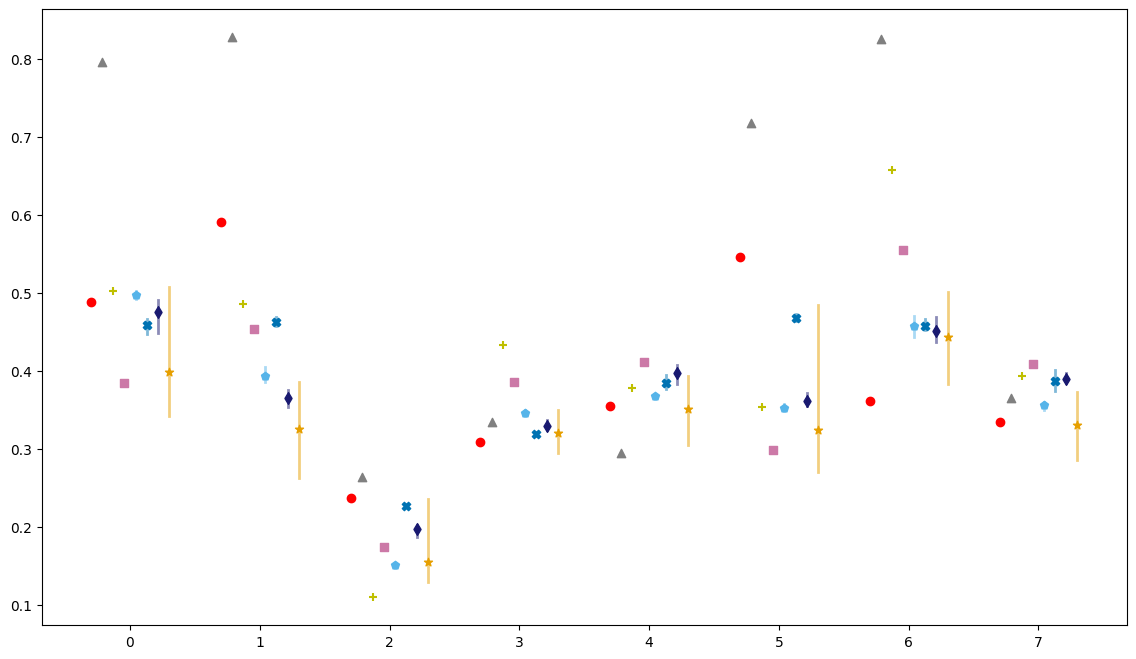

In [42]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(8)

for i, model in enumerate(labels):
    ax.scatter(x_axis+offsets[i], np.mean(rel_eces10[:, i, :], axis=-1), marker=markers[i], c=colors[i], label=model)
    for j in range(8):
        ax.plot([x_axis[j]+offsets[i], x_axis[j]+offsets[i]], np.quantile(rel_eces10[j, i, :], (0.05, 0.95), axis=-1), c=colors[i], lw=2, alpha=0.5)
    
ax.legend(ncol=2)
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

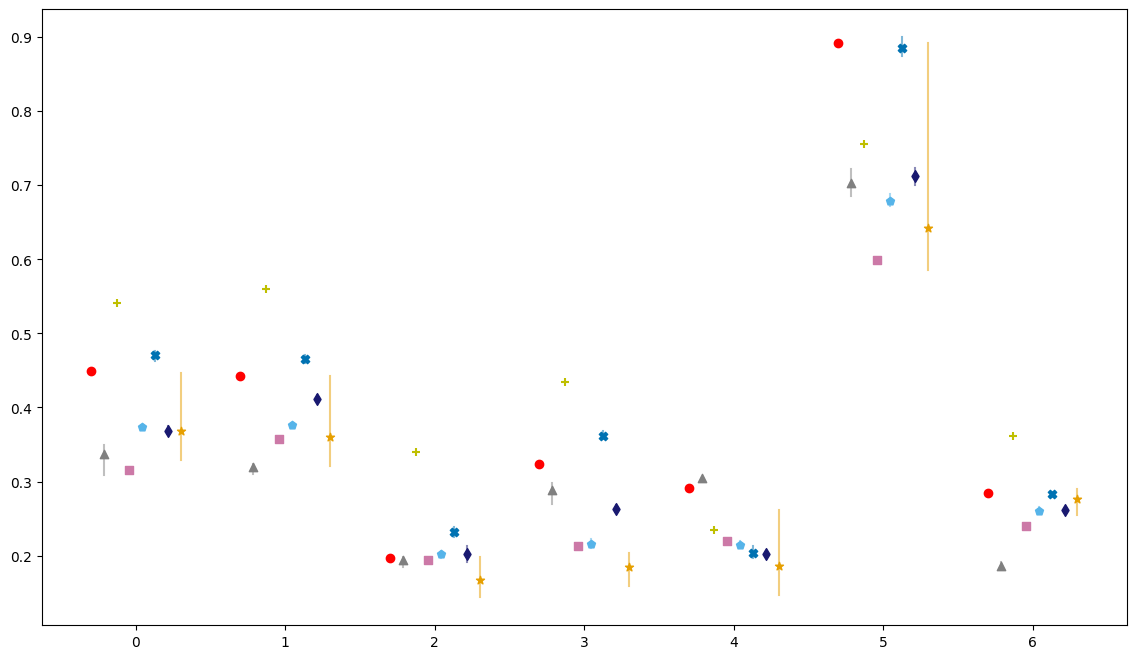

In [43]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(7)

for i, model in enumerate(labels):
    ax.scatter(x_axis+offsets[i], np.mean(rel_eces100[:, i, :], axis=-1), marker=markers[i], c=colors[i], label=model)
    for j in range(7):
        ax.plot([x_axis[j]+offsets[i], x_axis[j]+offsets[i]], np.quantile(rel_eces100[j, i, :], (0.05, 0.95), axis=-1), c=colors[i], alpha=0.5)
    
ax.legend(ncol=2)
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

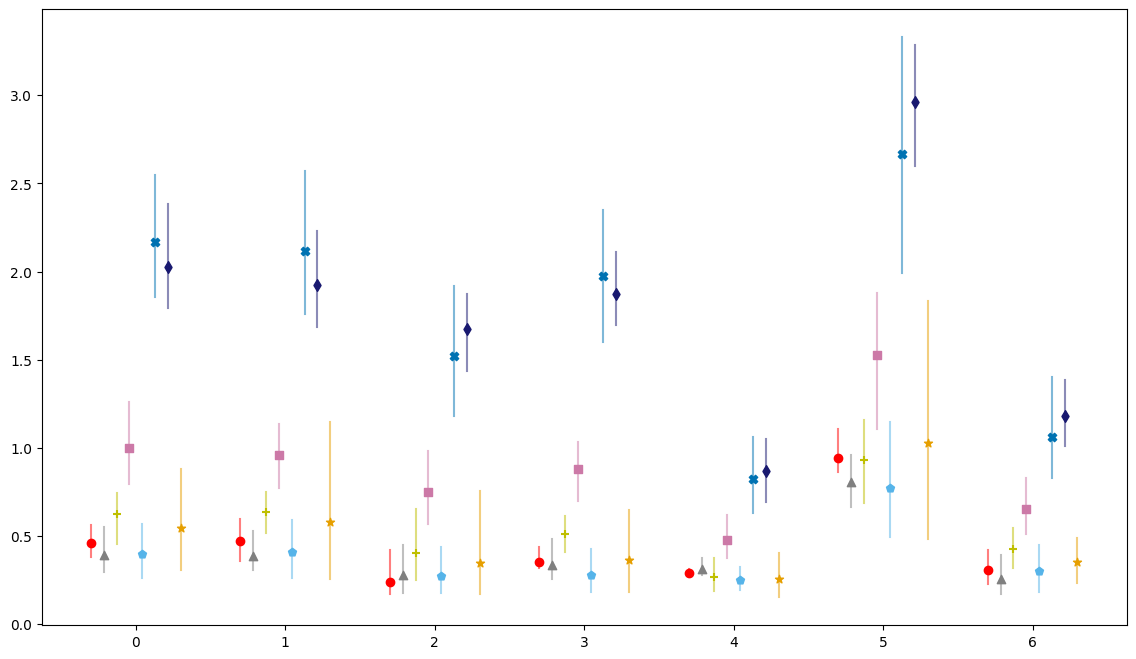

In [44]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(7)

for i, model in enumerate(labels):
    ax.scatter(x_axis+offsets[i], np.mean(rel_eces100_ld[:, i, :], axis=-1), marker=markers[i], c=colors[i], label=model)
    for j in range(7):
        ax.plot([x_axis[j]+offsets[i], x_axis[j]+offsets[i]], np.quantile(rel_eces100_ld[j, i, :], (0.05, 0.95), axis=-1), c=colors[i], alpha=0.5)
    
ax.legend(ncol=2)
plt.show()

In [45]:
offsets = np.linspace(-0.4, 0.4, 8)

IndexError: index 8 is out of bounds for axis 0 with size 8

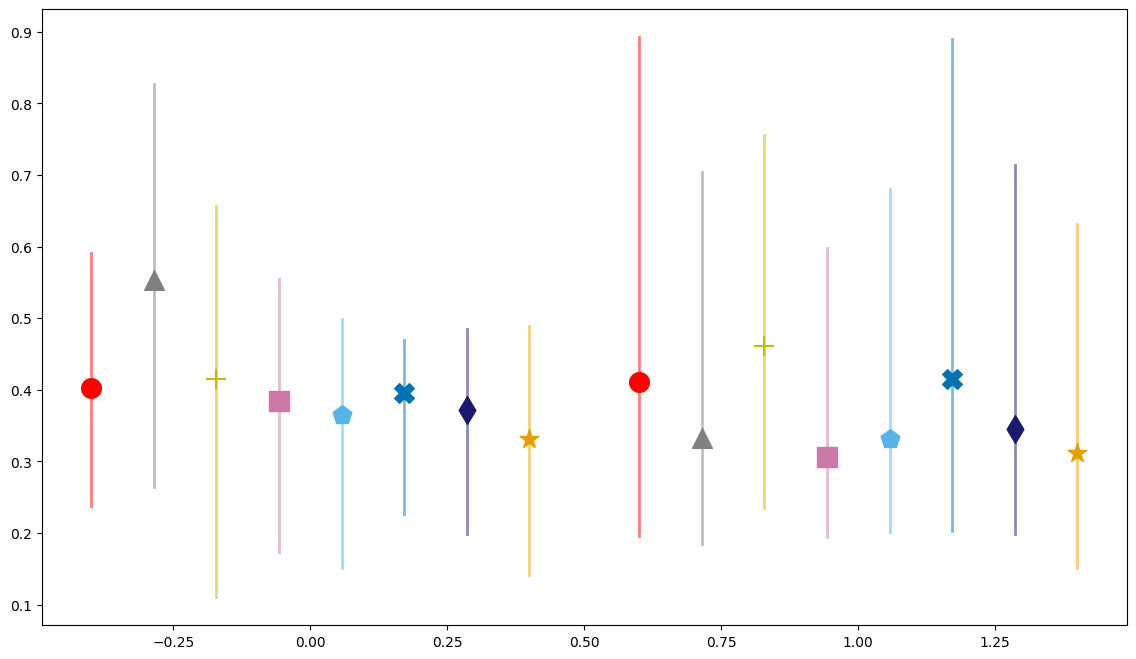

In [46]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(2)

for i, model in enumerate(labels):
    ax.scatter(x_axis[0]+offsets[i], np.mean(rel_eces10[:, i, :]), marker=markers[i], s=200, c=colors[i], label=model)
    ax.scatter(x_axis[1]+offsets[i], np.mean(rel_eces100[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.plot([x_axis[0]+offsets[i], x_axis[0]+offsets[i]], np.quantile(rel_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax.plot([x_axis[1]+offsets[i], x_axis[1]+offsets[i]], np.quantile(rel_eces100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.axhline(1.0, c='k', ls='--')
ax.set_xticks([0,1])
ax.set_xticklabels(['CIFAR-10','CIFAR-100'])

ax.set_ylabel('$\overline{ECE}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.tick_params(axis='y', labelrotation = 90)
ax.legend(fontsize=24, ncol=2)
    
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

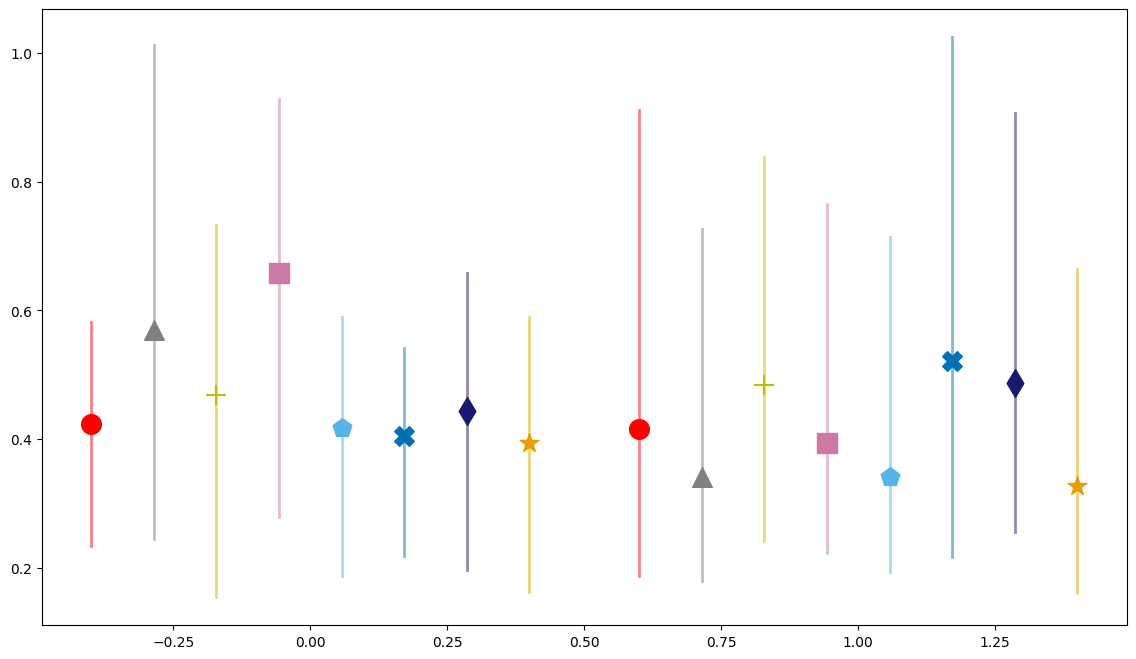

In [47]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(2)

for i, model in enumerate(labels):
    ax.scatter(x_axis[0]+offsets[i], np.mean(rel_eces10_md[:, i, :]), marker=markers[i], s=200, c=colors[i], label=model)
    ax.scatter(x_axis[1]+offsets[i], np.mean(rel_eces100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.plot([x_axis[0]+offsets[i], x_axis[0]+offsets[i]], np.quantile(rel_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax.plot([x_axis[1]+offsets[i], x_axis[1]+offsets[i]], np.quantile(rel_eces100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.axhline(1.0, c='k', ls='--')
ax.set_xticks([0,1])
ax.set_xticklabels(['CIFAR-10','CIFAR-100'])

ax.set_ylabel('$\overline{ECE}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=24, ncol=2)
    
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

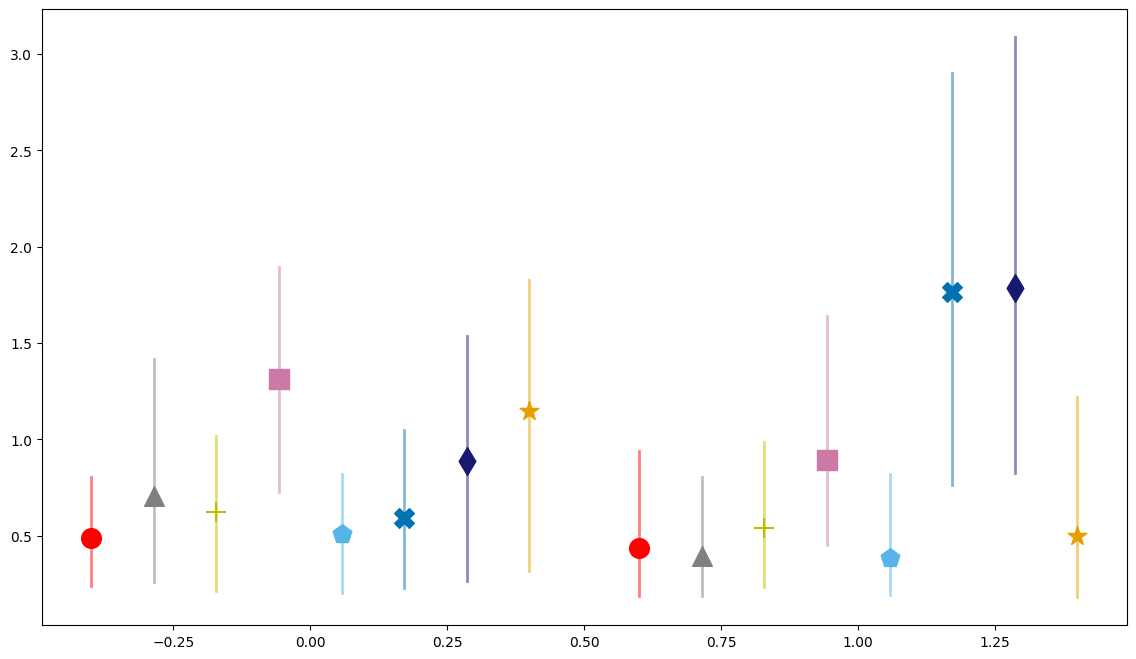

In [48]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(2)

for i, model in enumerate(labels):
    ax.scatter(x_axis[0]+offsets[i], np.mean(rel_eces10_ld[:, i, :]), marker=markers[i], s=200, c=colors[i], label=model)
    ax.scatter(x_axis[1]+offsets[i], np.mean(rel_eces100_ld[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.plot([x_axis[0]+offsets[i], x_axis[0]+offsets[i]], np.quantile(rel_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax.plot([x_axis[1]+offsets[i], x_axis[1]+offsets[i]], np.quantile(rel_eces100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.axhline(1.0, c='k', ls='--')
ax.set_xticks([0,1])
ax.set_xticklabels(['CIFAR-10','CIFAR-100'])

ax.set_ylabel('$\overline{ECE}$', fontsize=32, rotation=90, labelpad=0)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=24, ncol=2)
    
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

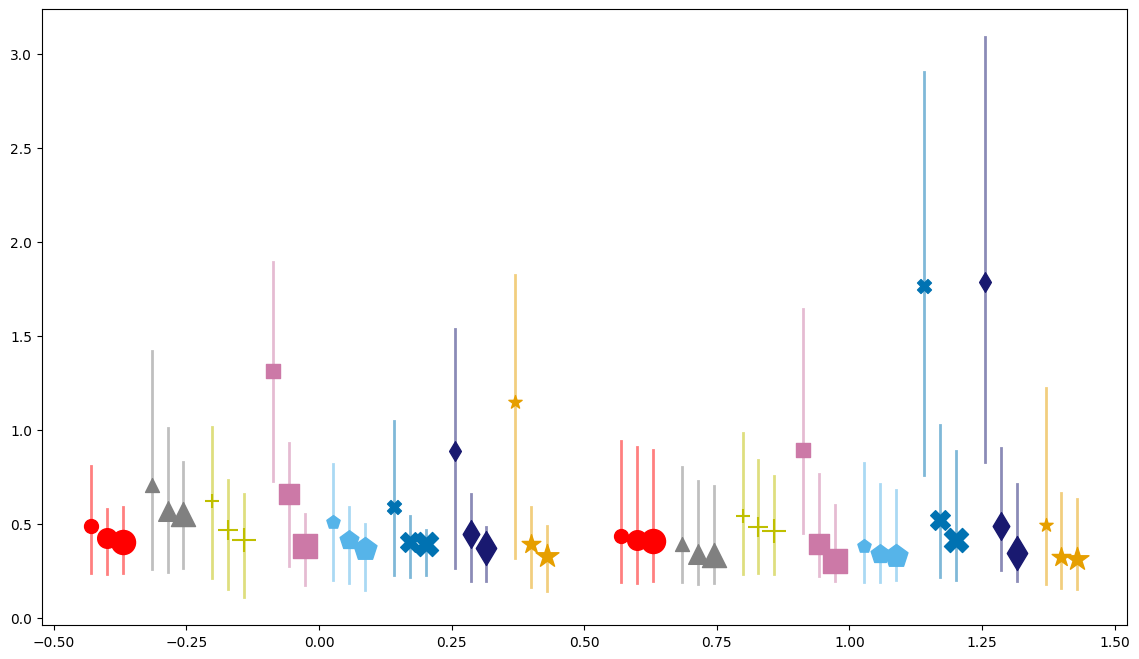

In [49]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(2)

for i, model in enumerate(labels):
    ax.scatter(x_axis[0]+offsets[i]-0.03, np.mean(rel_eces10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i], label=model)
    ax.scatter(x_axis[1]+offsets[i]-0.03, np.mean(rel_eces100_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax.plot([x_axis[0]+offsets[i]-0.03, x_axis[0]+offsets[i]-0.03], np.quantile(rel_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax.plot([x_axis[1]+offsets[i]-0.03, x_axis[1]+offsets[i]-0.03], np.quantile(rel_eces100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    ax.scatter(x_axis[0]+offsets[i], np.mean(rel_eces10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.scatter(x_axis[1]+offsets[i], np.mean(rel_eces100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.plot([x_axis[0]+offsets[i], x_axis[0]+offsets[i]], np.quantile(rel_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax.plot([x_axis[1]+offsets[i], x_axis[1]+offsets[i]], np.quantile(rel_eces100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    ax.scatter(x_axis[0]+offsets[i]+0.03, np.mean(rel_eces10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax.scatter(x_axis[1]+offsets[i]+0.03, np.mean(rel_eces100[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax.plot([x_axis[0]+offsets[i]+0.03, x_axis[0]+offsets[i]+0.03], np.quantile(rel_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax.plot([x_axis[1]+offsets[i]+0.03, x_axis[1]+offsets[i]+0.03], np.quantile(rel_eces100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.axhline(1.0, c='k', ls='--')
ax.set_xticks([0,1])
ax.set_xticklabels(['CIFAR-10','CIFAR-100'])
ax.set_ylim(0.5, 3)

ax.set_ylabel('$\overline{ECE}$', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(fontsize=24, ncol=2)
    
plt.show()

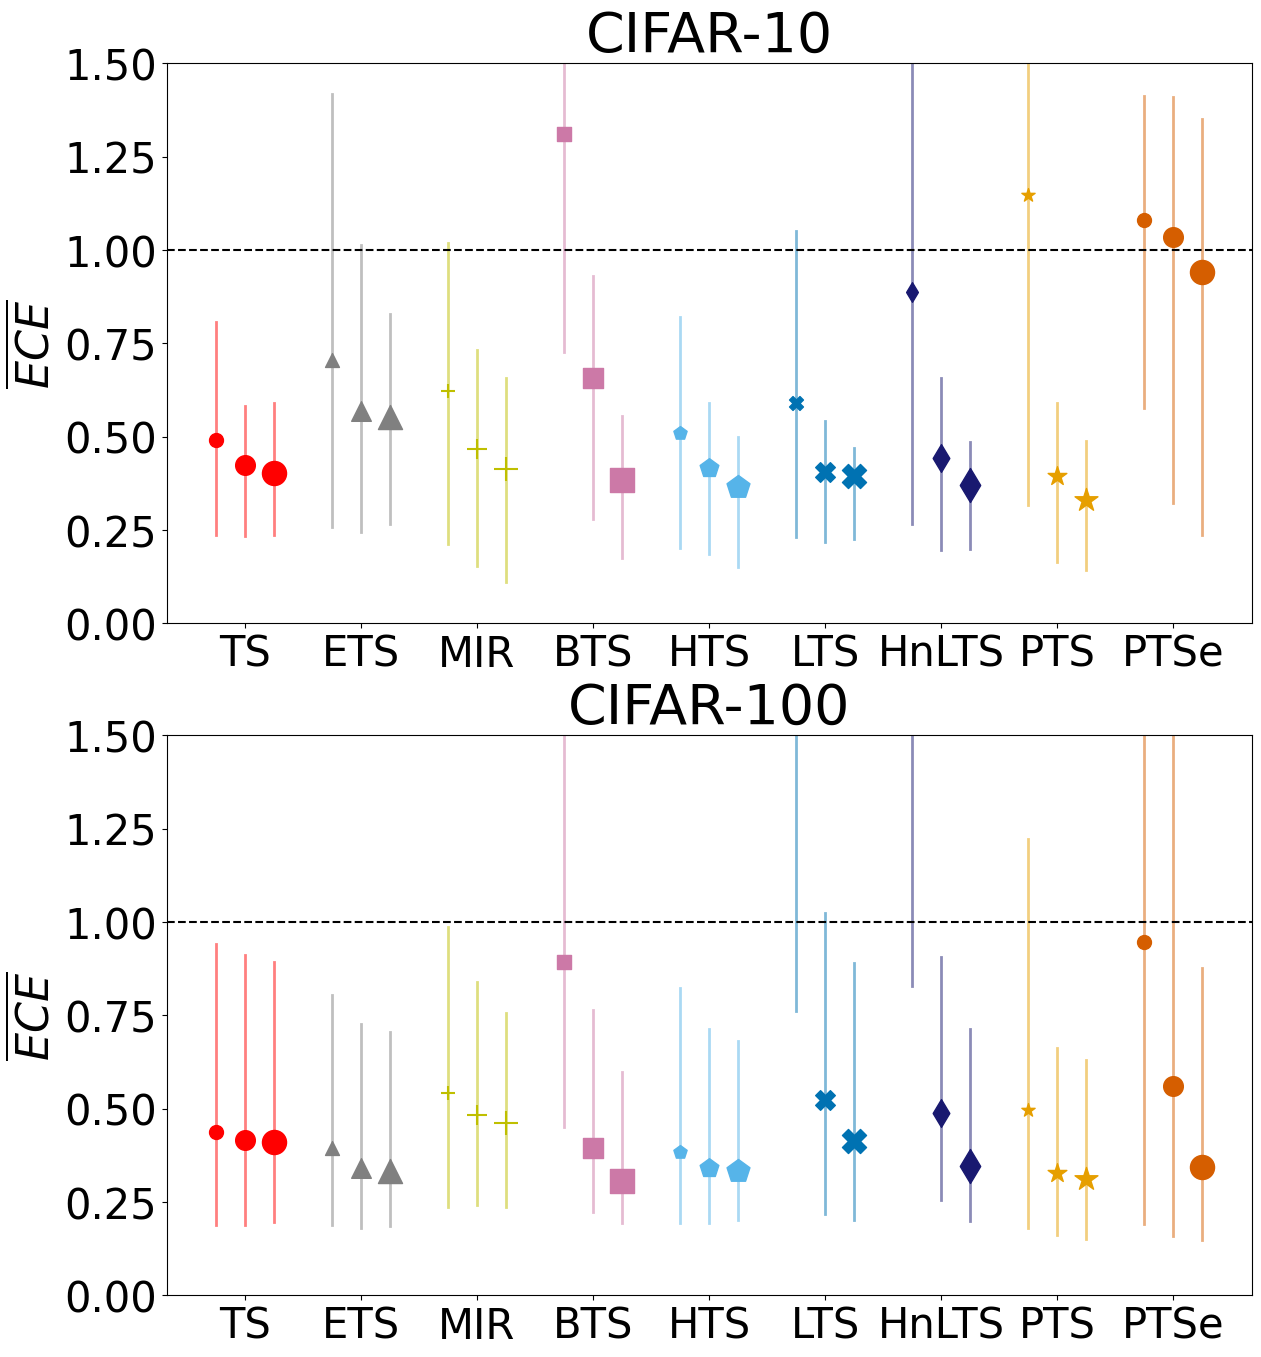

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(14, 16))
x_axis = np.arange(9)

for i, model in enumerate(labels):
    ax[0].scatter(x_axis[i]-0.25, np.mean(rel_eces10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[1].scatter(x_axis[i]-0.25, np.mean(rel_eces100_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[0].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_eces100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i], np.mean(rel_eces10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[1].scatter(x_axis[i], np.mean(rel_eces100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[0].plot([x_axis[i], x_axis[i]], np.quantile(rel_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i], x_axis[i]], np.quantile(rel_eces100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax[0].scatter(x_axis[i]+0.25, np.mean(rel_eces10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[1].scatter(x_axis[i]+0.25, np.mean(rel_eces100[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[0].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_eces100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax[0].set_title('CIFAR-10', fontsize=40)
ax[1].set_title('CIFAR-100', fontsize=40)


for ax_ in ax:
    ax_.axhline(1.0, c='k', ls='--')
    ax_.set_xticks(x_axis)
    ax_.set_xticklabels(labels)
    ax_.set_ylim(0, 1.5)

    ax_.set_ylabel('$\overline{ECE}$', fontsize=32)
    ax_.tick_params(axis='both', labelsize=30)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/relECE.png', dpi=300)
plt.show()

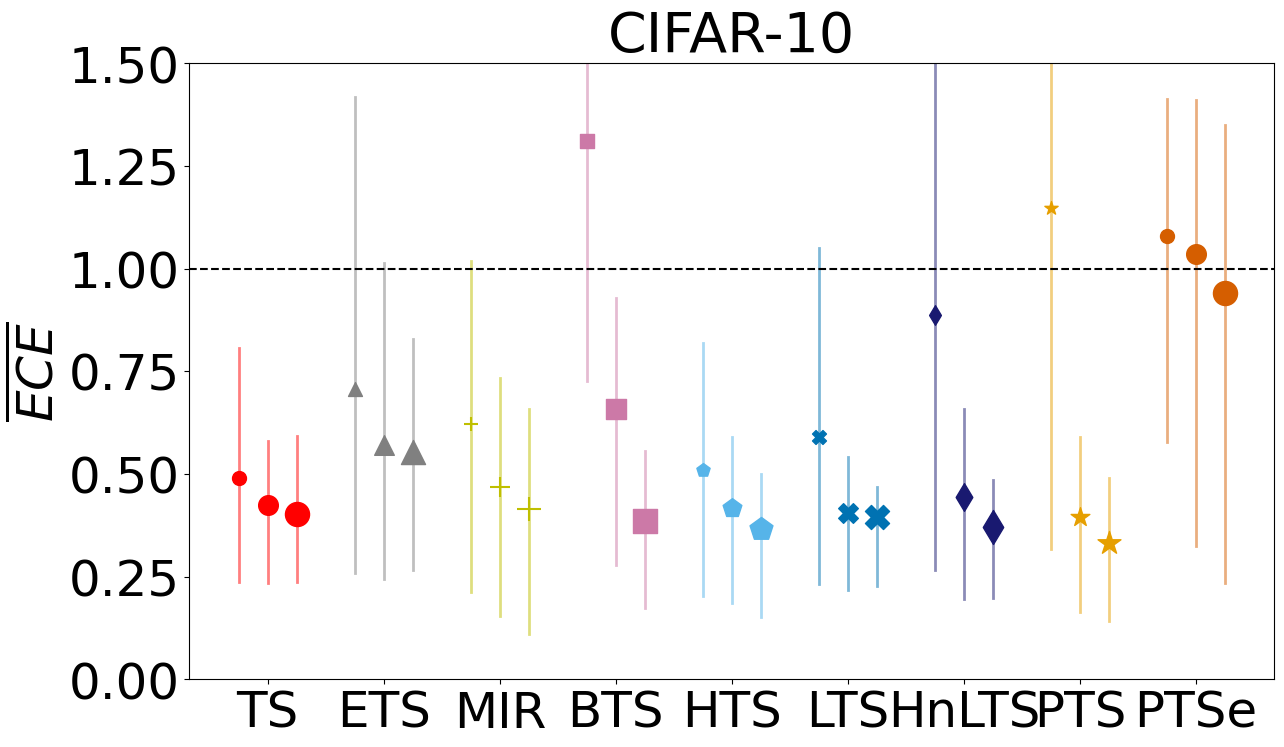

In [55]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(9)

for i, model in enumerate(labels):
    ax.scatter(x_axis[i]-0.25, np.mean(rel_eces10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(rel_eces10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.plot([x_axis[i], x_axis[i]], np.quantile(rel_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.25, np.mean(rel_eces10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.set_title('CIFAR-10', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.5)

ax.set_ylabel('$\overline{ECE}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/relECEc10.pdf')
plt.show()

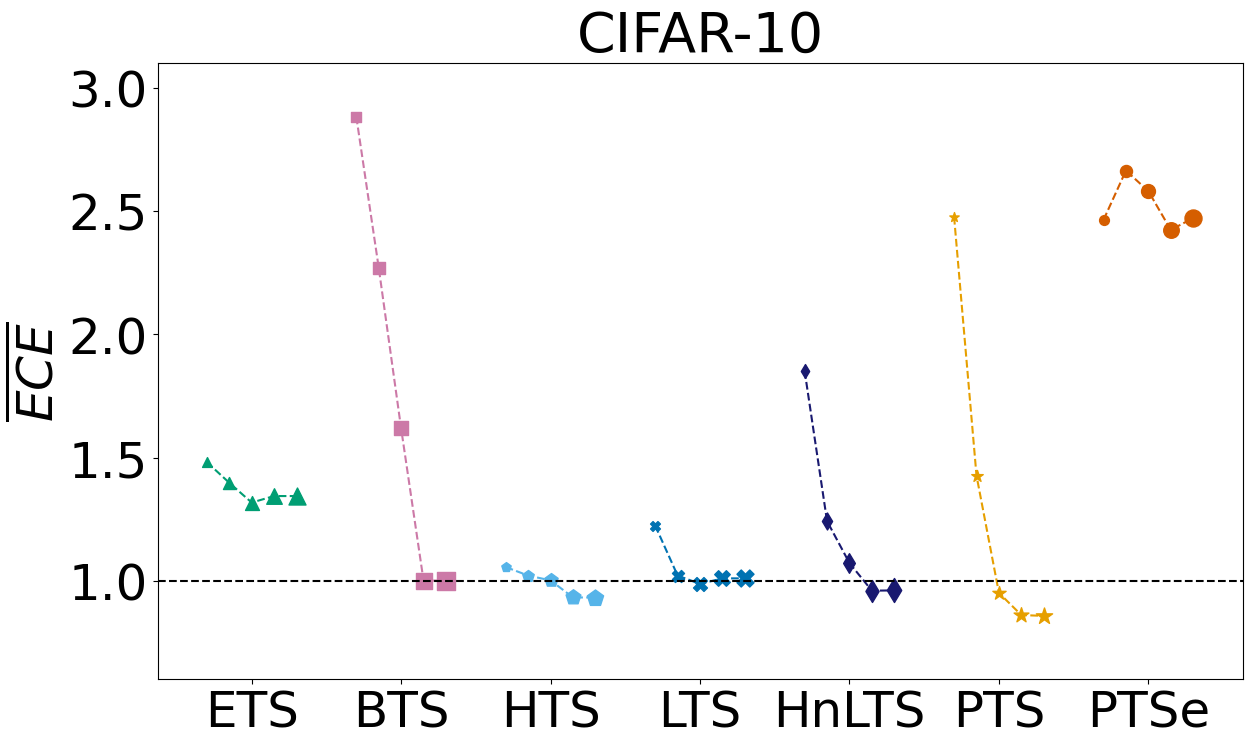

In [56]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(7)

for i, model in enumerate(labels_):
    
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_eces10_ld[:, i, :]), np.mean(_rel_eces10_mld[:, i, :]), np.mean(_rel_eces10_md[:, i, :]), np.mean(_rel_eces10_mhd[:, i, :]), np.mean(_rel_eces10[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_eces10_ld[:, i, :]), marker=markers_[i], s=50, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_eces10_mld[:, i, :]), marker=markers_[i], s=75, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_eces10_md[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_eces10_mhd[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_eces10[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-10', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.6, 3.1)

ax.set_ylabel('$\overline{ECE}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/_relECEc10.pdf')
plt.show()

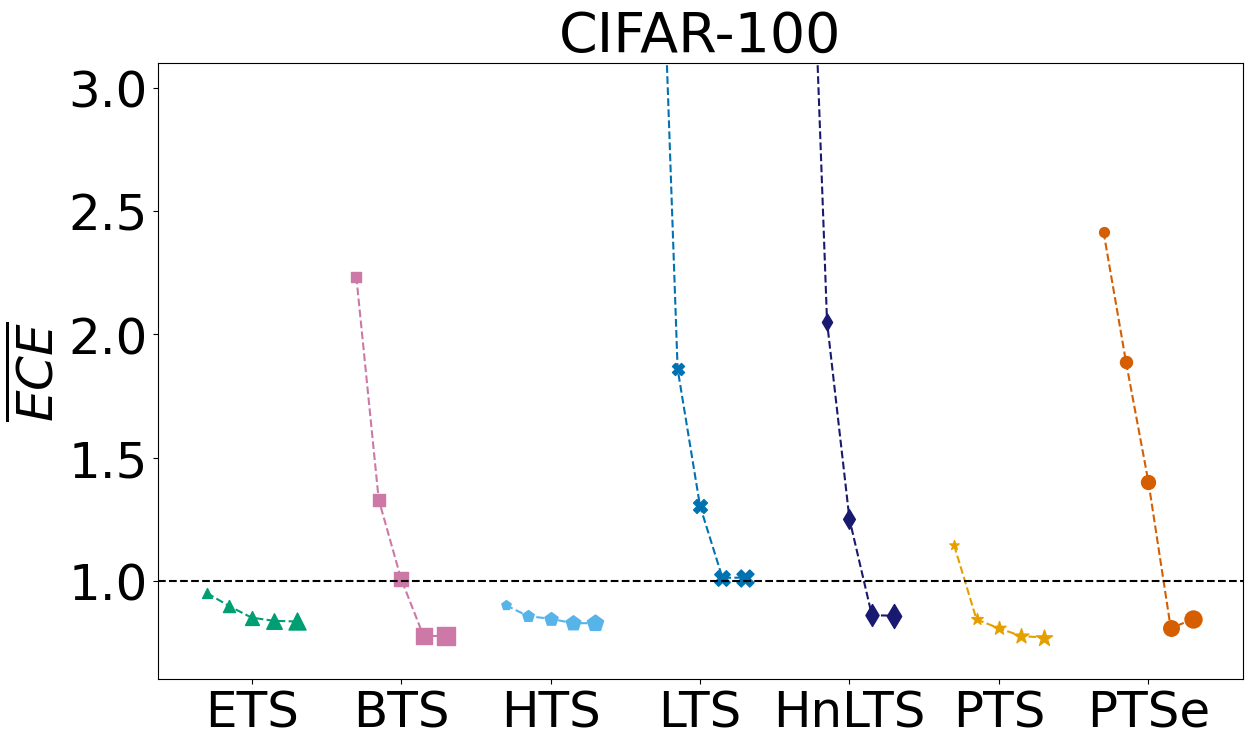

In [57]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(7)

for i, model in enumerate(labels_):
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_eces100_ld[:, i, :]), np.mean(_rel_eces100_mld[:, i, :]), np.mean(_rel_eces100_md[:, i, :]), np.mean(_rel_eces100_mhd[:, i, :]), np.mean(_rel_eces100[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_eces100_ld[:, i, :]), marker=markers_[i], s=50, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_eces100_mld[:, i, :]), marker=markers_[i], s=75, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_eces100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_eces100_md[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_eces100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_eces100_mhd[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_eces100[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_eces100[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-100', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.6, 3.1)

ax.set_ylabel('$\overline{ECE}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/_relECEc100.pdf')
plt.show()

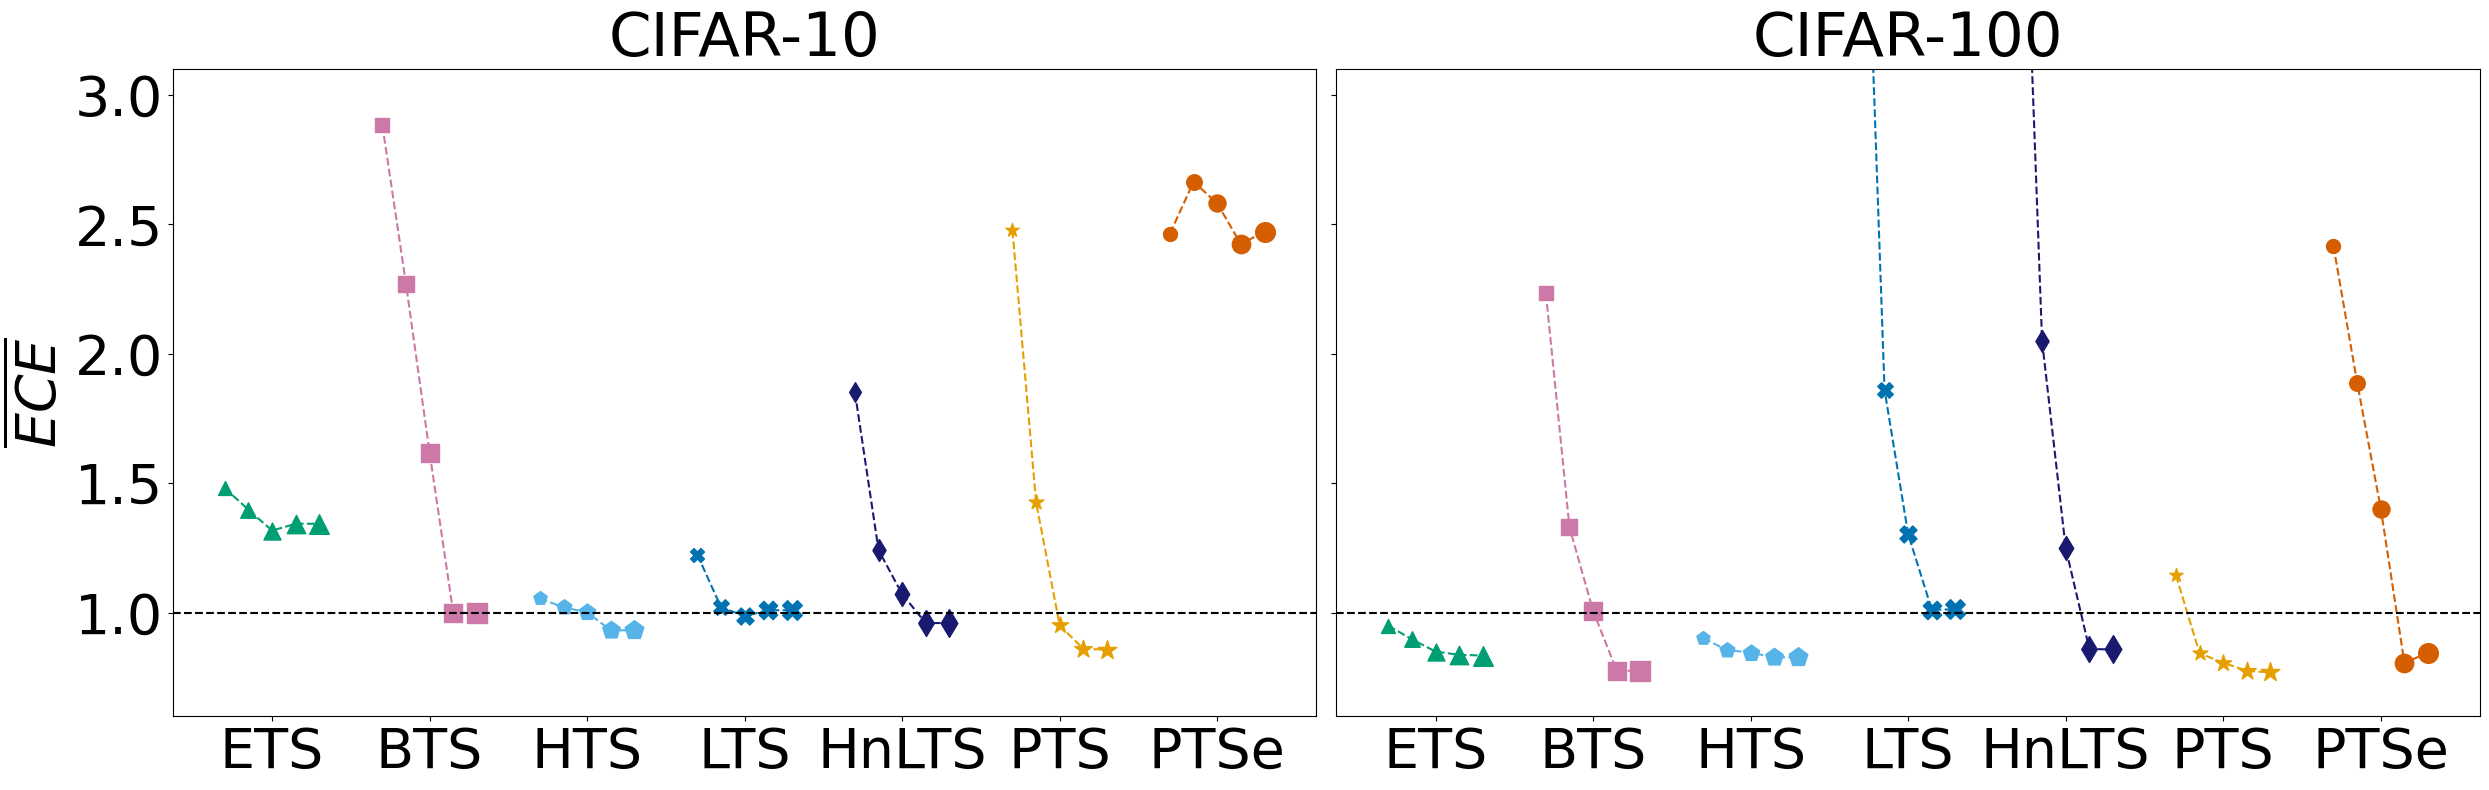

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
x_axis = np.arange(7)

ax = axs[0]

for i, model in enumerate(labels_):
    
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_eces10_ld[:, i, :]), np.mean(_rel_eces10_mld[:, i, :]), np.mean(_rel_eces10_md[:, i, :]), np.mean(_rel_eces10_mhd[:, i, :]), np.mean(_rel_eces10[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_eces10_ld[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_eces10_mld[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_eces10_md[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_eces10_mhd[:, i, :]), marker=markers_[i], s=175, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_eces10[:, i, :]), marker=markers_[i], s=200, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-10', fontsize=44)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.6, 3.1)

ax.set_ylabel('$\overline{ECE}$', fontsize=40)
ax.tick_params(axis='both', labelsize=40)

ax = axs[1]
x_axis = np.arange(7)

for i, model in enumerate(labels_):
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_eces100_ld[:, i, :]), np.mean(_rel_eces100_mld[:, i, :]), np.mean(_rel_eces100_md[:, i, :]), np.mean(_rel_eces100_mhd[:, i, :]), np.mean(_rel_eces100[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_eces100_ld[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_eces100_mld[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_eces100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_eces100_md[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_eces100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_eces100_mhd[:, i, :]), marker=markers_[i], s=175, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_eces100[:, i, :]), marker=markers_[i], s=200, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_eces100[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-100', fontsize=44)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.6, 3.1)
ax.tick_params(axis='both', labelsize=40)

plt.tight_layout()
    
fig.savefig('../../results/imgs_thesis/_relECE.pdf')
plt.show()

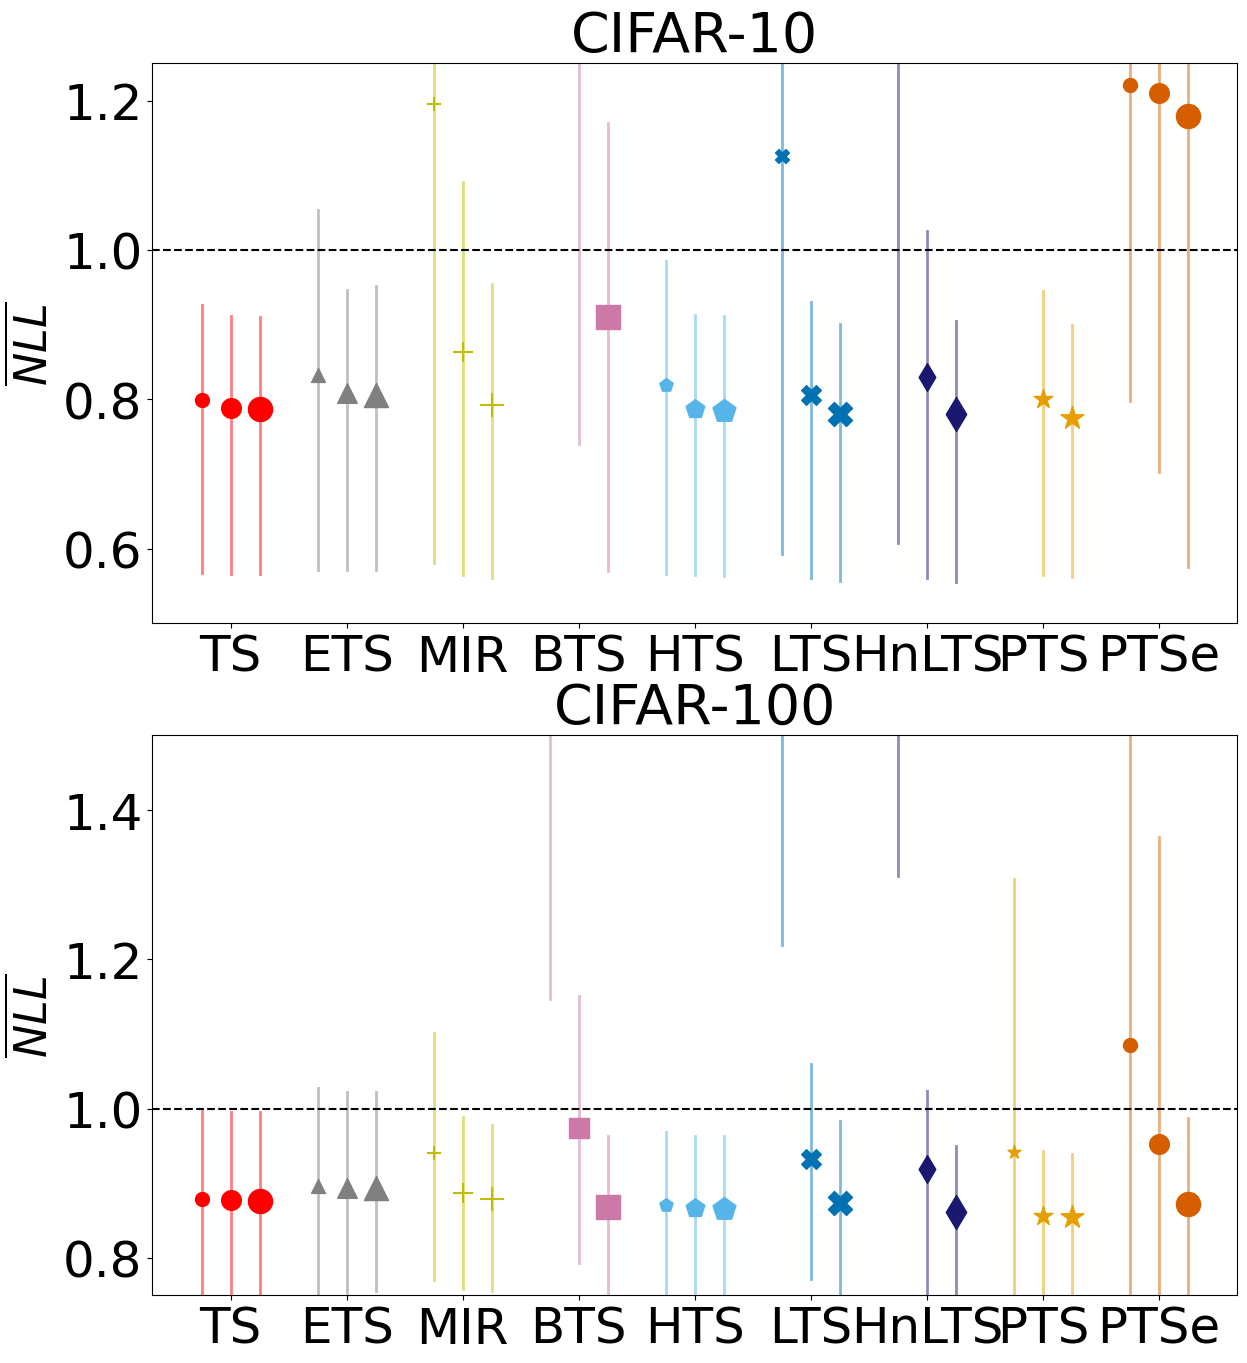

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(14, 16))
x_axis = np.arange(9)

for i, model in enumerate(labels):
    ax[0].scatter(x_axis[i]-0.25, np.mean(rel_nlls10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[1].scatter(x_axis[i]-0.25, np.mean(rel_nlls100_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[0].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_nlls10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_nlls100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i], np.mean(rel_nlls10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[1].scatter(x_axis[i], np.mean(rel_nlls100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[0].plot([x_axis[i], x_axis[i]], np.quantile(rel_nlls10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i], x_axis[i]], np.quantile(rel_nlls100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax[0].scatter(x_axis[i]+0.25, np.mean(rel_nlls10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[1].scatter(x_axis[i]+0.25, np.mean(rel_nlls100[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[0].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_nlls10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_nlls100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax[0].set_title('CIFAR-10', fontsize=40)
ax[1].set_title('CIFAR-100', fontsize=40)

ax[0].set_ylim(0.5, 1.25)
ax[1].set_ylim(0.75, 1.5)

for ax_ in ax:
    ax_.axhline(1.0, c='k', ls='--')
    ax_.set_xticks(x_axis)
    ax_.set_xticklabels(labels)

    ax_.set_ylabel('$\overline{NLL}$', fontsize=32)
    ax_.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/relNLL.pdf')
plt.show()

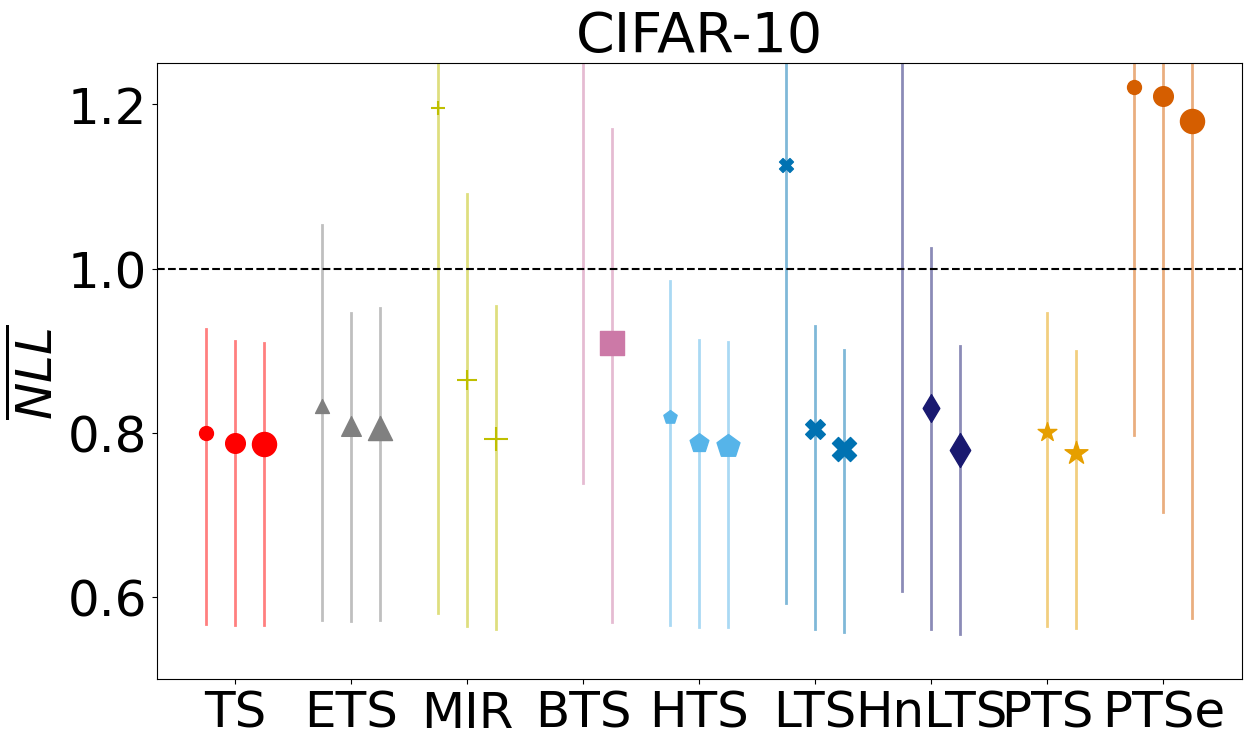

In [60]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(9)

for i, model in enumerate(labels):
    ax.scatter(x_axis[i]-0.25, np.mean(rel_nlls10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_nlls10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(rel_nlls10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax.plot([x_axis[i], x_axis[i]], np.quantile(rel_nlls10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.25, np.mean(rel_nlls10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_nlls10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.set_title('CIFAR-10', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.set_ylim(0.5, 1.25)

ax.set_ylabel('$\overline{NLL}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/relNLLc10.pdf')
plt.show()

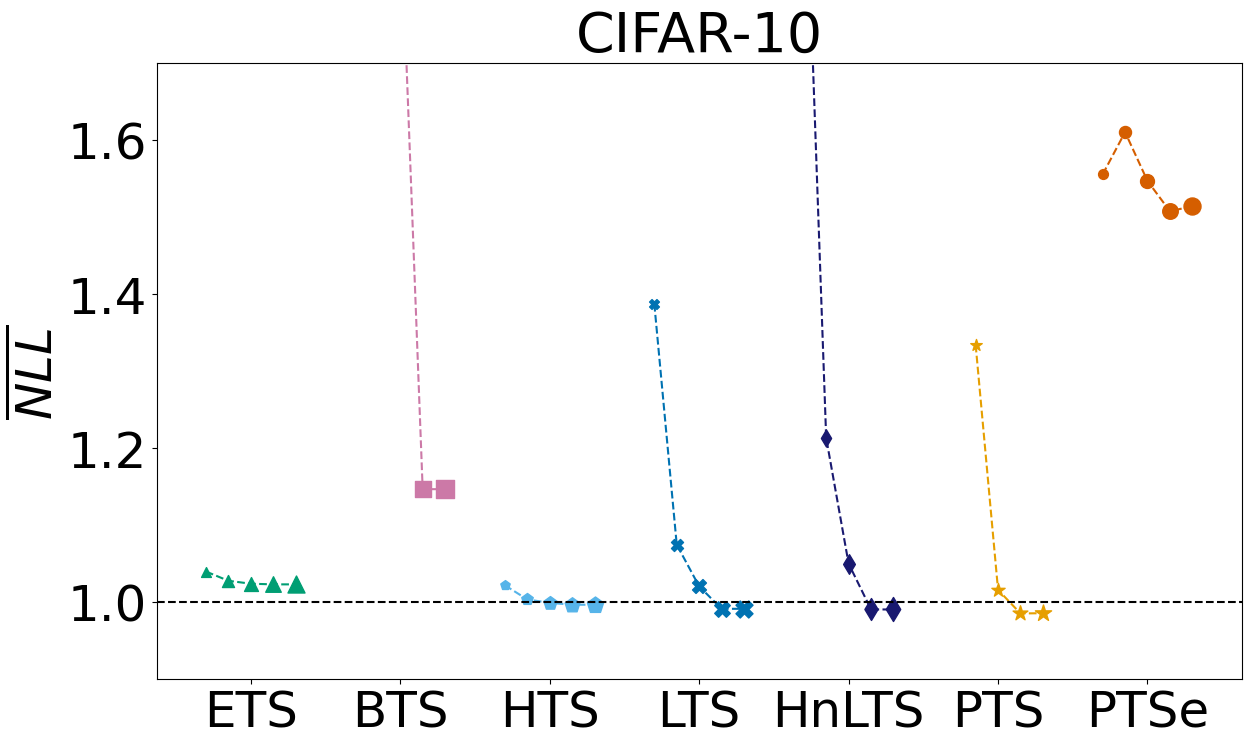

In [61]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(7)

for i, model in enumerate(labels_):
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_nlls10_ld[:, i, :]), np.mean(_rel_nlls10_mld[:, i, :]), np.mean(_rel_nlls10_md[:, i, :]), np.mean(_rel_nlls10_mhd[:, i, :]), np.mean(_rel_nlls10[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_nlls10_ld[:, i, :]), marker=markers_[i], s=50, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_nlls10_mld[:, i, :]), marker=markers_[i], s=75, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_nlls10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_nlls10_md[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_nlls10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_nlls10_mhd[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_nlls10[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_nlls10[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-10', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.9, 1.7)

ax.set_ylabel('$\overline{NLL}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/_relNLLc10.pdf')
plt.show()

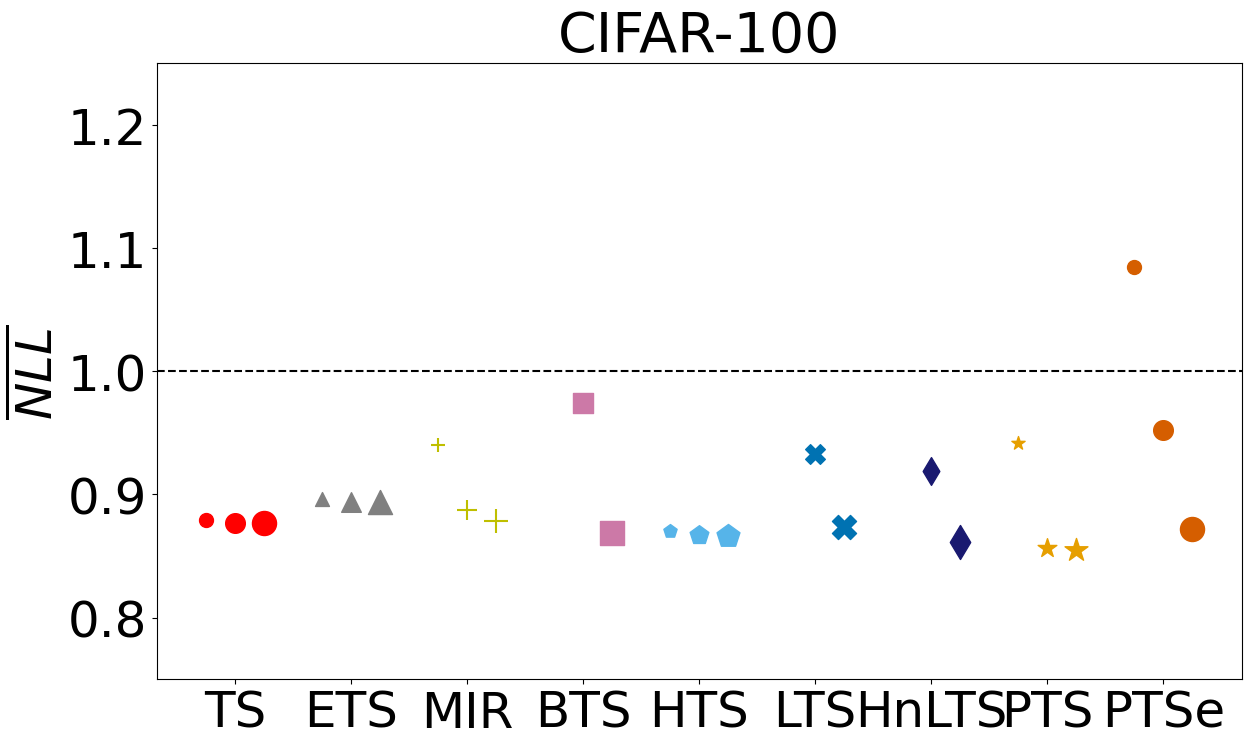

In [62]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(9)

for i, model in enumerate(labels):
    ax.scatter(x_axis[i]-0.25, np.mean(rel_nlls100_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_nlls100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(rel_nlls100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(rel_nlls100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.25, np.mean(rel_nlls100[:, i, :]), marker=markers[i], s=300, c=colors[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_nlls100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax.set_title('CIFAR-100', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.set_ylim(0.75, 1.25)

ax.set_ylabel('$\overline{NLL}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/relNLLc100.pdf')
plt.show()

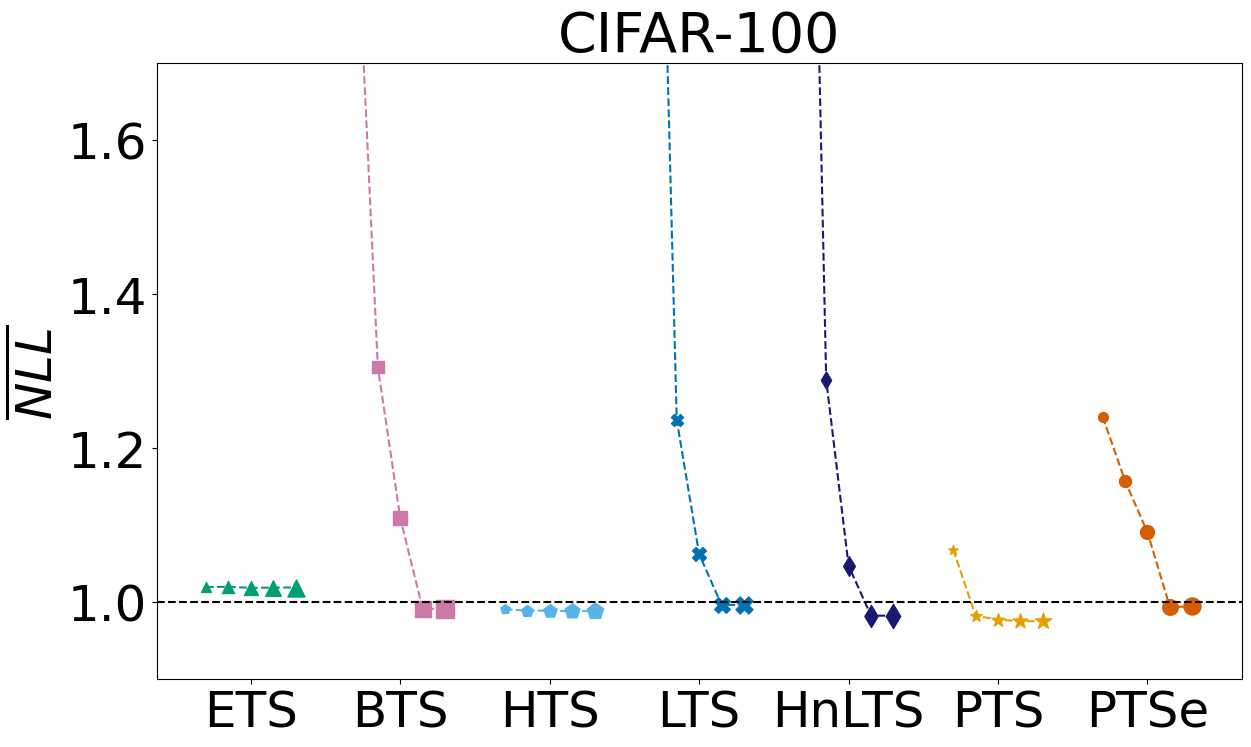

In [63]:
fig, ax = plt.subplots(figsize=(14, 8))
x_axis = np.arange(7)

for i, model in enumerate(labels_):
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_nlls100_ld[:, i, :]), np.mean(_rel_nlls100_mld[:, i, :]), np.mean(_rel_nlls100_md[:, i, :]), np.mean(_rel_nlls100_mhd[:, i, :]), np.mean(_rel_nlls100[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_nlls100_ld[:, i, :]), marker=markers_[i], s=50, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_nlls100_mld[:, i, :]), marker=markers_[i], s=75, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_nlls100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_nlls100_md[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_nlls100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_nlls100_mhd[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_nlls100[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_nlls100[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-100', fontsize=40)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.9, 1.7)

ax.set_ylabel('$\overline{NLL}$', fontsize=36)
ax.tick_params(axis='both', labelsize=36)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/_relNLLc100.pdf')
plt.show()

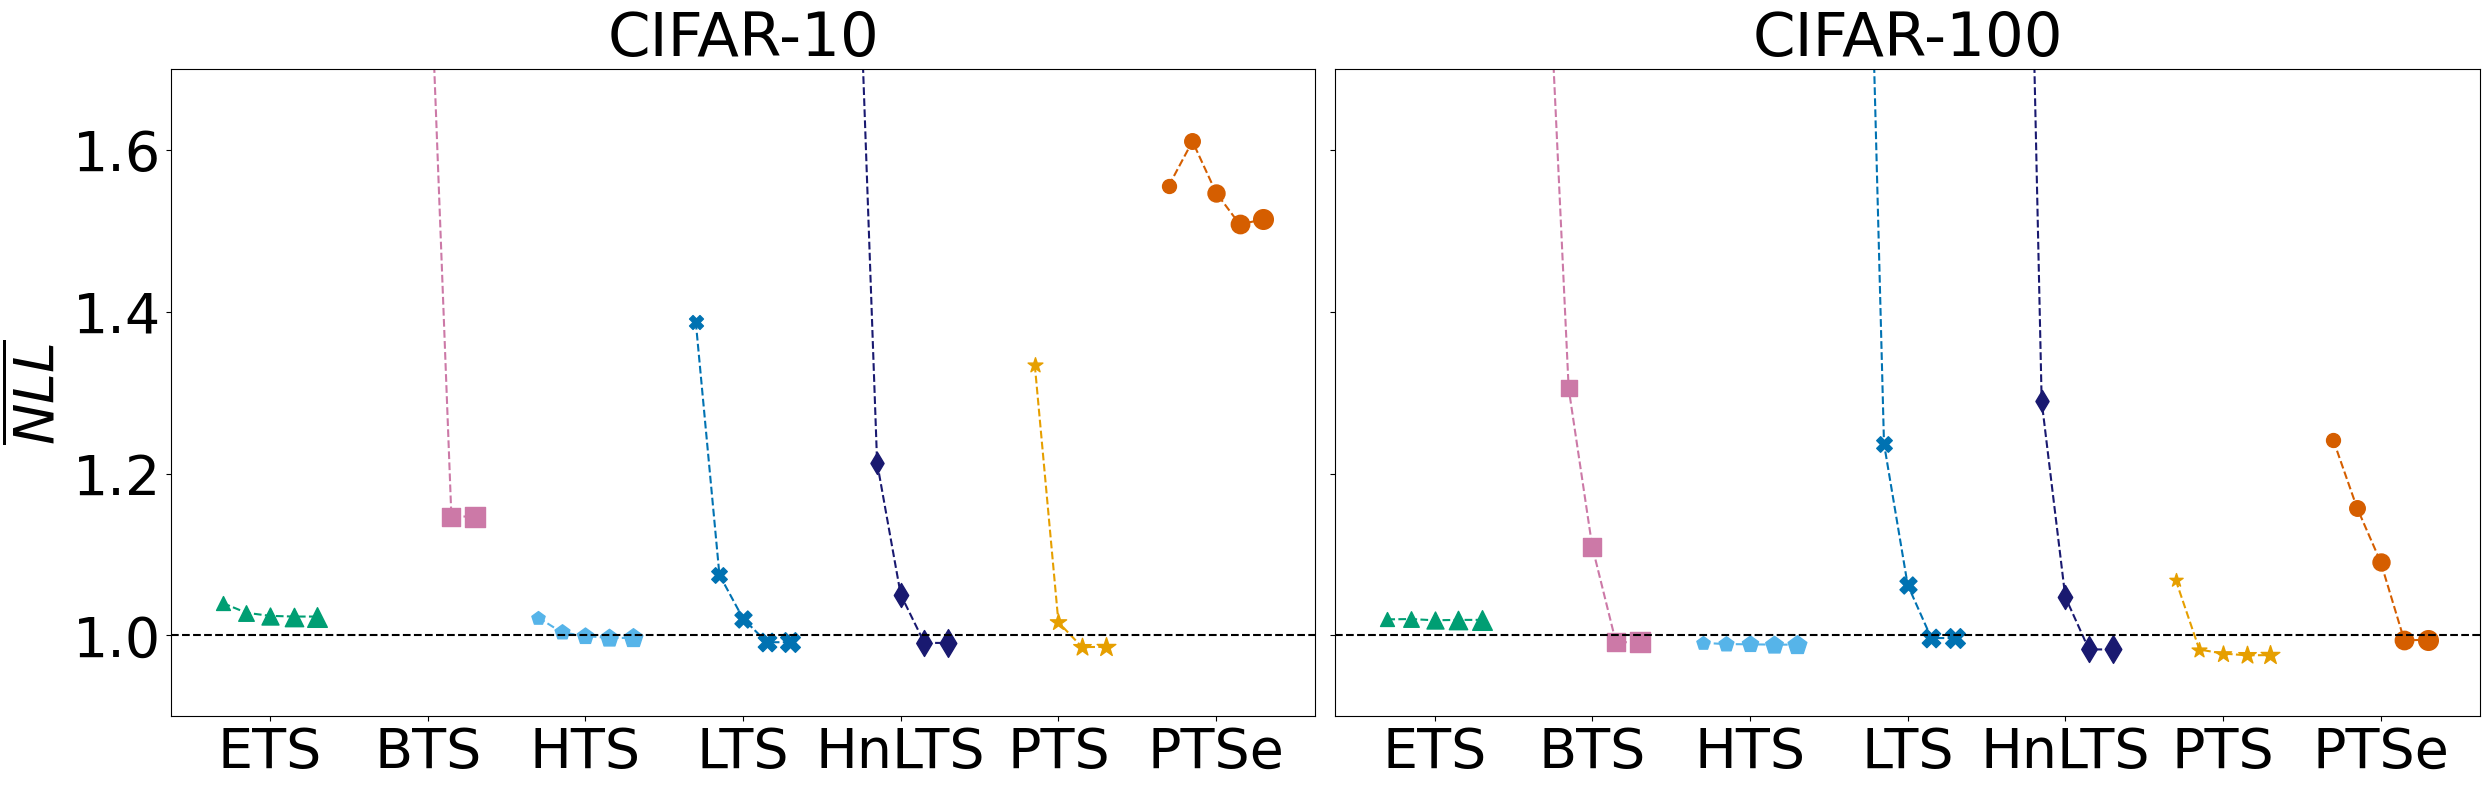

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
x_axis = np.arange(7)

ax = axs[0]

for i, model in enumerate(labels_):
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_nlls10_ld[:, i, :]), np.mean(_rel_nlls10_mld[:, i, :]), np.mean(_rel_nlls10_md[:, i, :]), np.mean(_rel_nlls10_mhd[:, i, :]), np.mean(_rel_nlls10[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_nlls10_ld[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_nlls10_mld[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_nlls10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_nlls10_md[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_nlls10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_nlls10_mhd[:, i, :]), marker=markers_[i], s=175, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_nlls10[:, i, :]), marker=markers_[i], s=200, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_nlls10[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-10', fontsize=44)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.9, 1.7)

ax.set_ylabel('$\overline{NLL}$', fontsize=40)
ax.tick_params(axis='both', labelsize=40)

ax = axs[1]
x_axis = np.arange(7)

for i, model in enumerate(labels_):
    curr_x = [x_axis[i]-0.3, x_axis[i]-0.15, x_axis[i], x_axis[i]+0.15, x_axis[i]+0.3]
    curr_y = [np.mean(_rel_nlls100_ld[:, i, :]), np.mean(_rel_nlls100_mld[:, i, :]), np.mean(_rel_nlls100_md[:, i, :]), np.mean(_rel_nlls100_mhd[:, i, :]), np.mean(_rel_nlls100[:, i, :])]
    ax.plot(curr_x, curr_y, ls='--', c=colors_[i])
    
    
    
    ax.scatter(x_axis[i]-0.3, np.mean(_rel_nlls100_ld[:, i, :]), marker=markers_[i], s=100, c=colors_[i])
    ax.scatter(x_axis[i]-0.15, np.mean(_rel_nlls100_mld[:, i, :]), marker=markers_[i], s=125, c=colors_[i])
    # ax.plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(_rel_nlls100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    ax.scatter(x_axis[i], np.mean(_rel_nlls100_md[:, i, :]), marker=markers_[i], s=150, c=colors_[i])
    # ax.plot([x_axis[i], x_axis[i]], np.quantile(_rel_nlls100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
    
    
    ax.scatter(x_axis[i]+0.15, np.mean(_rel_nlls100_mhd[:, i, :]), marker=markers_[i], s=175, c=colors_[i])
    ax.scatter(x_axis[i]+0.30, np.mean(_rel_nlls100[:, i, :]), marker=markers_[i], s=200, c=colors_[i])
    # ax.plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(_rel_nlls100[:, i, :], (0.05, 0.95)), lw=2, c=colors_[i], alpha=0.5)
    
ax.set_title('CIFAR-100', fontsize=44)

ax.axhline(1.0, c='k', ls='--')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels_)
ax.set_ylim(0.9, 1.7)
ax.tick_params(axis='both', labelsize=40)

plt.tight_layout()
    
fig.savefig('../../results/imgs_thesis/_relNLL.pdf')
plt.show()

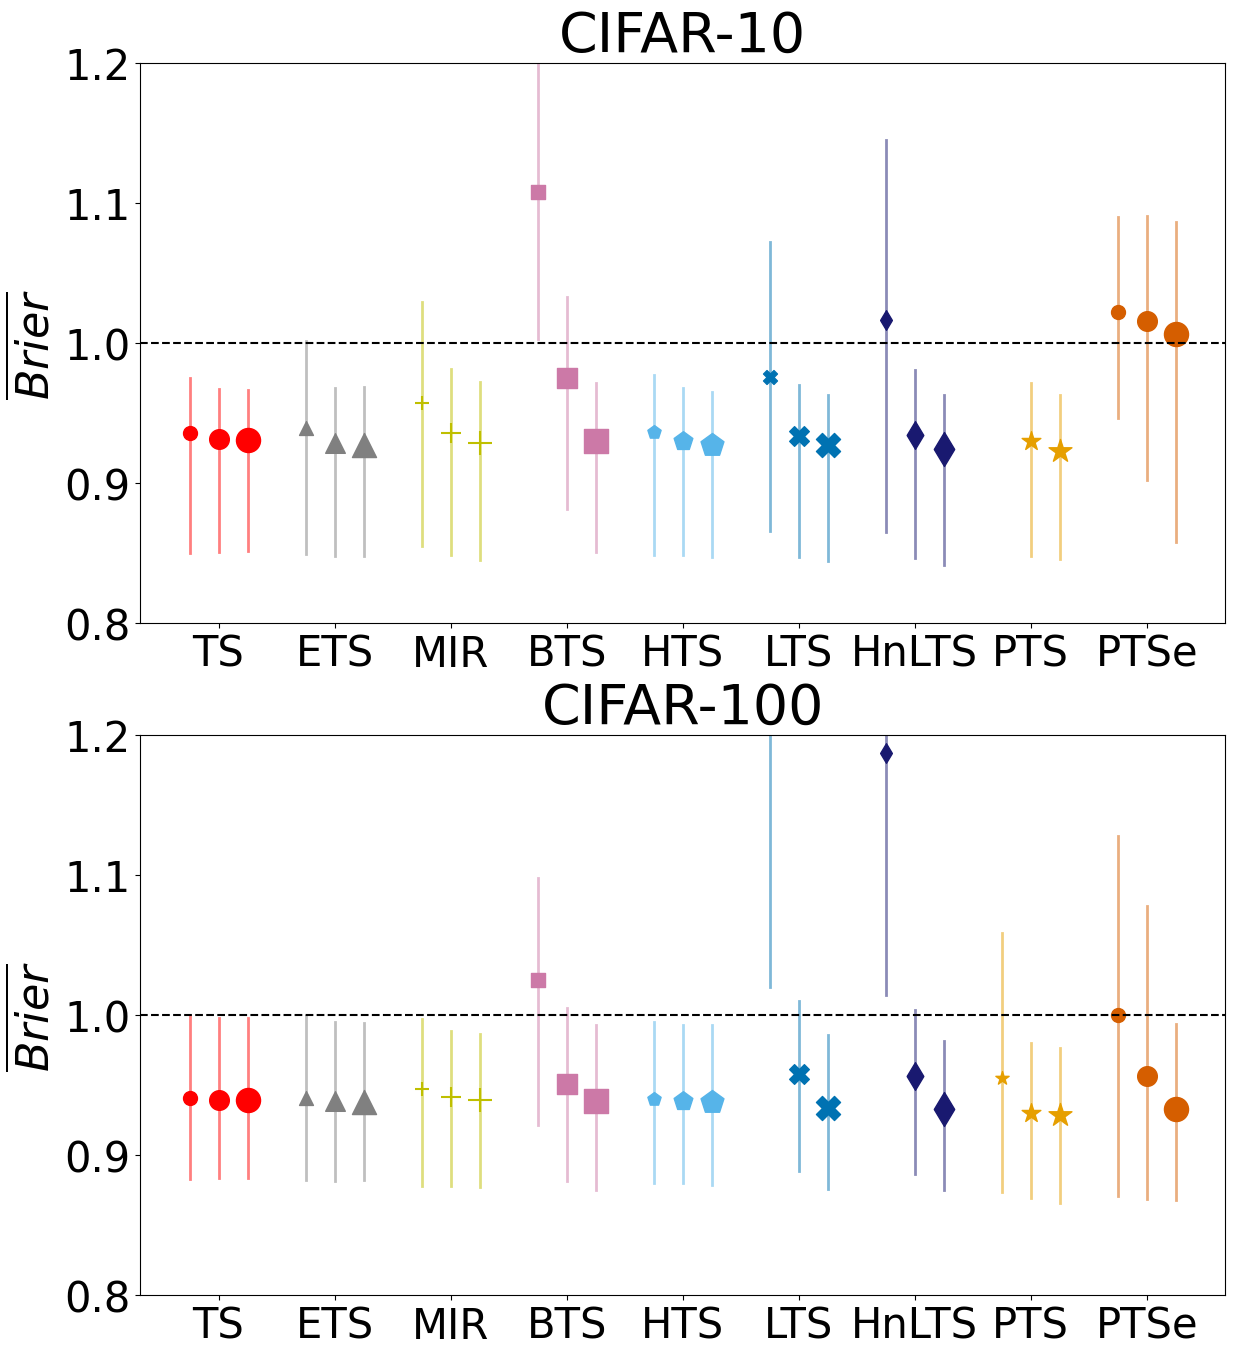

In [65]:
fig, ax = plt.subplots(2, 1, figsize=(14, 16))
x_axis = np.arange(9)

for i, model in enumerate(labels):
    ax[0].scatter(x_axis[i]-0.25, np.mean(rel_bris10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[1].scatter(x_axis[i]-0.25, np.mean(rel_bris100_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[0].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_bris10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(rel_bris100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i], np.mean(rel_bris10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[1].scatter(x_axis[i], np.mean(rel_bris100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[0].plot([x_axis[i], x_axis[i]], np.quantile(rel_bris10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i], x_axis[i]], np.quantile(rel_bris100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax[0].scatter(x_axis[i]+0.25, np.mean(rel_bris10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[1].scatter(x_axis[i]+0.25, np.mean(rel_bris100[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[0].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_bris10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(rel_bris100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax[0].set_title('CIFAR-10', fontsize=40)
ax[1].set_title('CIFAR-100', fontsize=40)


for ax_ in ax:
    ax_.axhline(1.0, c='k', ls='--')
    ax_.set_xticks(x_axis)
    ax_.set_xticklabels(labels)
    ax_.set_ylim(0.8, 1.2)

    ax_.set_ylabel('$\overline{Brier}$', fontsize=32)
    ax_.tick_params(axis='both', labelsize=30)
    
# fig.savefig('C:/Users/sergi/Google Drive/PhD/AdaTS/imgsPaper/relBri.pdf')
    
plt.show()

NameError: name 'gain_eces10_ld' is not defined

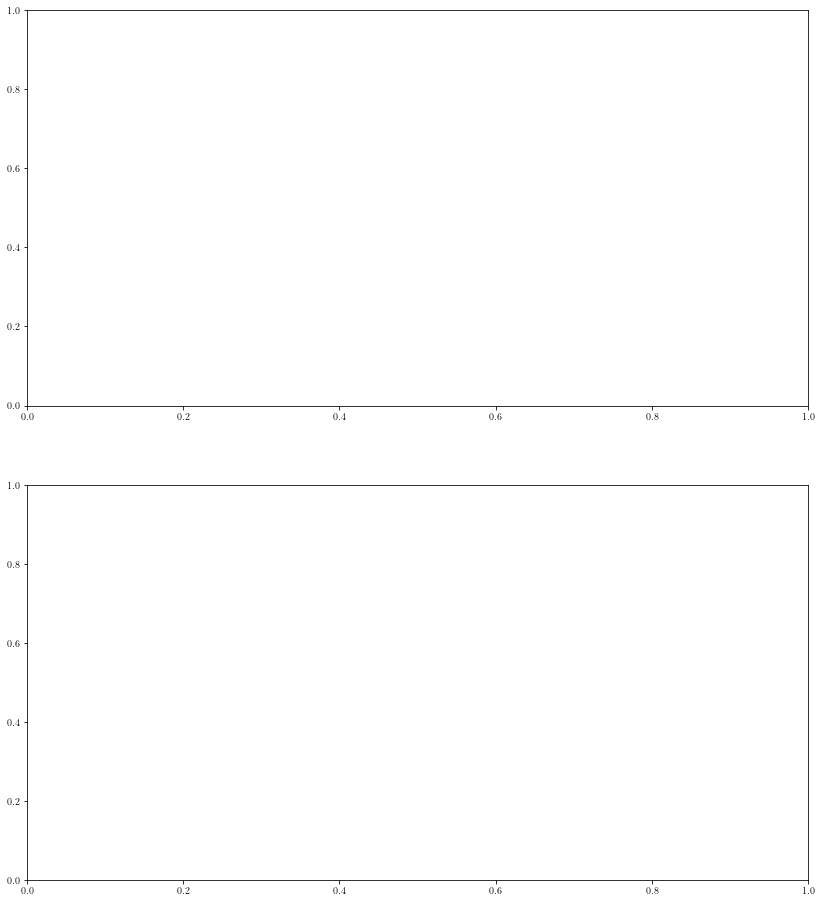

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(14, 16))
x_axis = np.arange(8)

for i, model in enumerate(labels):
    ax[0].scatter(x_axis[i]-0.25, np.mean(gain_eces10_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[1].scatter(x_axis[i]-0.25, np.mean(gain_eces100_ld[:, i, :]), marker=markers[i], s=100, c=colors[i])
    ax[0].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(gain_eces10_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile(gain_eces100_ld[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i], np.mean(gain_eces10_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[1].scatter(x_axis[i], np.mean(gain_eces100_md[:, i, :]), marker=markers[i], s=200, c=colors[i])
    ax[0].plot([x_axis[i], x_axis[i]], np.quantile(gain_eces10_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i], x_axis[i]], np.quantile(gain_eces100_md[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
    
    
    ax[0].scatter(x_axis[i]+0.25, np.mean(gain_eces10[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[1].scatter(x_axis[i]+0.25, np.mean(gain_eces100[:, i, :]), marker=markers[i], s=300, c=colors[i])
    ax[0].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(gain_eces10[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile(gain_eces100[:, i, :], (0.05, 0.95)), lw=2, c=colors[i], alpha=0.5)
    
ax[0].set_title('CIFAR-10', fontsize=40)
ax[1].set_title('CIFAR-100', fontsize=40)


for ax_ in ax:
    ax_.axhline(0.0, c='k', ls='--')
    ax_.set_xticks(x_axis)
    ax_.set_xticklabels(labels)

    ax_.set_ylabel('$\Delta ECE$', fontsize=32)
    ax_.tick_params(axis='both', labelsize=30)
    
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

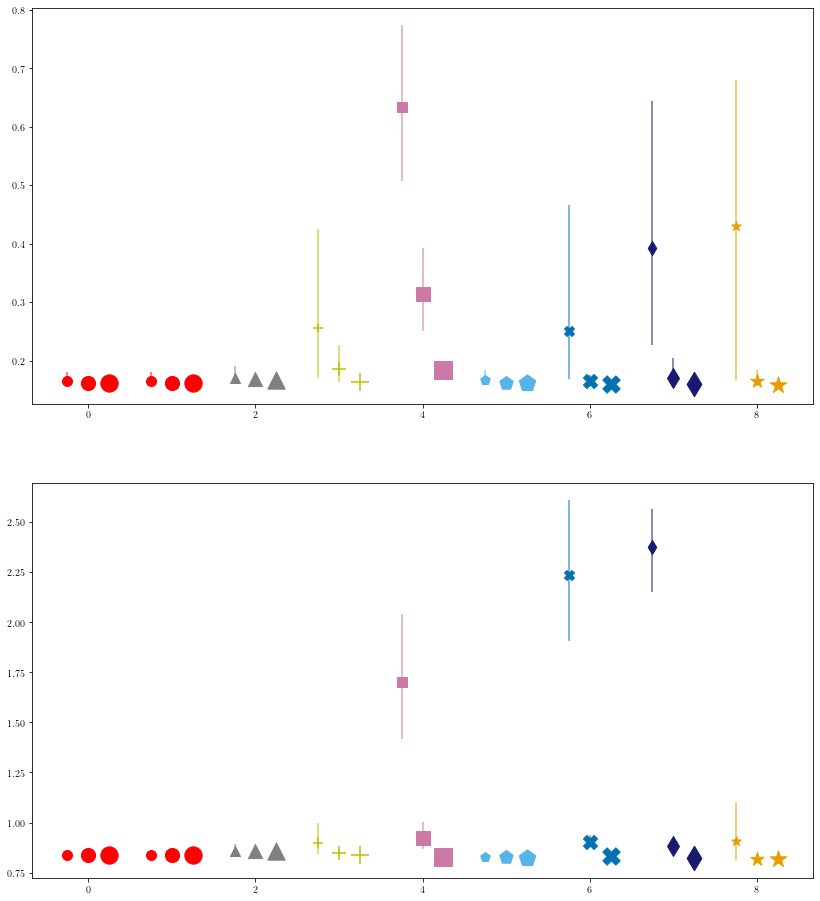

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(14, 16))
x_axis = np.arange(9)

NNmodel = 'densenet-121'

_models = ['TS'] + models
_markers = ['o'] + markers
_colors = ['r'] + colors

for i, model in enumerate(_models):
    ax[0].scatter(x_axis[i]-0.25, NLL.loc[('cifar10', 200, NNmodel)][model], marker=_markers[i], s=100, c=_colors[i])
    ax[1].scatter(x_axis[i]-0.25, NLL.loc[('cifar100', 200, NNmodel)][model], marker=_markers[i], s=100, c=_colors[i])
    ax[0].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile([_NLL.loc[('cifar10', 200, NNmodel)][model] for _NLL in NLLs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile([_NLL.loc[('cifar100', 200, NNmodel)][model] for _NLL in NLLs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i], NLL.loc[('cifar10', 1000, NNmodel)][model], marker=_markers[i], s=200, c=_colors[i])
    ax[1].scatter(x_axis[i], NLL.loc[('cifar100', 1000, NNmodel)][model], marker=_markers[i], s=200, c=_colors[i])
    ax[0].plot([x_axis[i], x_axis[i]], np.quantile([_NLL.loc[('cifar10', 1000, NNmodel)][model] for _NLL in NLLs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    ax[1].plot([x_axis[i], x_axis[i]], np.quantile([_NLL.loc[('cifar100', 1000, NNmodel)][model] for _NLL in NLLs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i]+0.25, NLL.loc[('cifar10', 10000, NNmodel)][model], marker=_markers[i], s=300, c=_colors[i])
    ax[1].scatter(x_axis[i]+0.25, NLL.loc[('cifar100', 10000, NNmodel)][model], marker=_markers[i], s=300, c=_colors[i])
    ax[0].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile([_NLL.loc[('cifar10', 10000, NNmodel)][model] for _NLL in NLLs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile([_NLL.loc[('cifar100', 10000, NNmodel)][model] for _NLL in NLLs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    
ax[0].set_title('DenseNet-121 \n CIFAR-10', fontsize=40)
ax[1].set_title('DenseNet-121 \n CIFAR-100', fontsize=40)


ax[0].axhline(NLL.loc[('cifar10', 10000, NNmodel)]['Uncalibrated'], c='k', ls='--', label='Uncalibrated')
ax[1].axhline(NLL.loc[('cifar100', 10000, NNmodel)]['Uncalibrated'], c='k', ls='--', label='Uncalibrated')

ax[0].set_ylim(0.15, 0.4)
ax[1].set_ylim(0.8, 1.2)

for ax_ in ax:
    ax_.set_xticks(x_axis)
    ax_.set_xticklabels(['TS'] + labels)

    ax_.set_ylabel('$NLL$', fontsize=32)
    ax_.tick_params(axis='both', labelsize=30)
    ax_.legend(fontsize=24, loc=0)
    
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(14, 16))
x_axis = np.arange(9)

_models = ['TS'] + models
_markers = ['o'] + markers
_colors = ['r'] + colors

for i, model in enumerate(_models):
    ax[0].scatter(x_axis[i]-0.25, ECE.loc[('cifar10', 200, 'densenet-121')][model], marker=_markers[i], s=100, c=_colors[i])
    ax[1].scatter(x_axis[i]-0.25, ECE.loc[('cifar100', 200, 'densenet-121')][model], marker=_markers[i], s=100, c=_colors[i])
    ax[0].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile([_ECE.loc[('cifar10', 200, 'densenet-121')][model] for _ECE in ECEs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]-0.25, x_axis[i]-0.25], np.quantile([_ECE.loc[('cifar100', 200, 'densenet-121')][model] for _ECE in ECEs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i], ECE.loc[('cifar10', 1000, 'densenet-121')][model], marker=_markers[i], s=200, c=_colors[i])
    ax[1].scatter(x_axis[i], ECE.loc[('cifar100', 1000, 'densenet-121')][model], marker=_markers[i], s=200, c=_colors[i])
    ax[0].plot([x_axis[i], x_axis[i]], np.quantile([_ECE.loc[('cifar10', 1000, 'densenet-121')][model] for _ECE in ECEs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    ax[1].plot([x_axis[i], x_axis[i]], np.quantile([_ECE.loc[('cifar100', 1000, 'densenet-121')][model] for _ECE in ECEs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    
    
    ax[0].scatter(x_axis[i]+0.25, ECE.loc[('cifar10', 10000, 'densenet-121')][model], marker=_markers[i], s=300, c=_colors[i])
    ax[1].scatter(x_axis[i]+0.25, ECE.loc[('cifar100', 10000, 'densenet-121')][model], marker=_markers[i], s=300, c=_colors[i])
    ax[0].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile([_ECE.loc[('cifar10', 10000, 'densenet-121')][model] for _ECE in ECEs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    ax[1].plot([x_axis[i]+0.25, x_axis[i]+0.25], np.quantile([_ECE.loc[('cifar100', 10000, 'densenet-121')][model] for _ECE in ECEs], (0.05, 0.95)), lw=2, c=_colors[i], alpha=0.5)
    
ax[0].set_title('DenseNet-121 \n CIFAR-10', fontsize=40)
ax[1].set_title('DenseNet-121 \n CIFAR-100', fontsize=40)


ax[0].axhline(ECE.loc[('cifar10', 10000, 'densenet-121')]['Uncalibrated'], c='k', ls='--', label='Uncalibrated')
ax[1].axhline(ECE.loc[('cifar100', 10000, 'densenet-121')]['Uncalibrated'], c='k', ls='--', label='Uncalibrated')

# ax[0].set_ylim(0.1, 0.4)
# ax[1].set_ylim(0.7, 1.2)

for ax_ in ax:
    ax_.set_xticks(x_axis)
    ax_.set_xticklabels(['TS'] + labels)

    ax_.set_ylabel('$ECE$', fontsize=32)
    ax_.tick_params(axis='both', labelsize=30)
    ax_.legend(fontsize=24, loc=0)
    
plt.tight_layout()
plt.show()

In [9]:
def highlight_min(s):
    '''
    highlight the minimum.
    '''
    is_max = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_max]

In [10]:
def highlight_min_br(s):
    print(s['ECE'])
    
    
    s['ECE'].style.apply(highlight_min, subset=s.select_dtypes(float))
    s['NLL'].style.apply(highlight_min, subset=s.select_dtypes(float))
    s['Brier'].style.apply(highlight_min, subset=s.select_dtypes(float))
      
    return s

### CIFAR 10

In [11]:
curr_ece15 = ECE15.loc['cifar10']
curr_ece = ECE.loc['cifar10']
curr_nll = NLL.loc['cifar10']
curr_bri = Bri.loc['cifar10']

In [12]:
ECE15.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-12-f4843b779753>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE15.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,2.642584,2.663559,10.686585,4.268243,2.832803,4.561870,1.834526,3.000970
TS,1.014121,0.829599,2.351264,1.198918,0.738372,1.718529,0.516938,0.918689
ETS,1.797012,2.127014,2.328938,1.173737,0.568172,2.881861,1.520533,0.798778
MIR,1.245873,1.154840,0.769365,1.621956,0.966860,1.545232,1.227502,0.884049
BTS,0.803925,0.916503,1.407277,1.277797,0.942596,1.162204,0.821558,1.014570
HTS_torch,1.078882,0.903037,1.292646,1.297788,0.827701,1.419163,0.617649,0.921512
LTS_torch,1.054627,0.851534,2.152823,1.237642,0.832011,1.416480,0.466862,0.963511
HnLTS_torch,1.151567,0.912865,1.482276,1.358630,0.829775,1.487923,0.618712,1.005198
PTS,0.857481,0.648142,1.303284,1.083385,0.697979,1.231829,0.610419,0.831091
PTS_ece,3.055806,1.730285,6.407009,4.059547,3.299216,4.902112,0.823959,3.459715


In [13]:
print(ECE15.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex()) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &        TS &       ETS &       MIR &       BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &       PTS &   PTS\_ece \\
Model             &               &           &           &           &           &            &            &              &           &           \\
\midrule
densenet-121      &      2.642584 &  1.014121 &  1.797012 &  1.245873 &  0.803925 &   1.078882 &   1.054627 &     1.151567 &  0.857481 &  3.055806 \\
densenet-169      &      2.663559 &  0.829599 &  2.127014 &  1.154840 &  0.916503 &   0.903037 &   0.851534 &     0.912865 &  0.648142 &  1.730285 \\
resnet-50         &     10.686585 &  2.351264 &  2.328938 &  0.769365 &  1.407277 &   1.292646 &   2.152823 &     1.482276 &  1.303284 &  6.407009 \\
resnet-101        &      4.268243 &  1.198918 &  1.173737 &  1.621956 &  1.277797 &   1.297788 &   1.237642 &     1.358630 &  1.083385 &  4.059547 \\
resnext-29\_8x16   &      2.832803 &  0.738372 &  0.568172 &  0.

<ipython-input-13-dc01e6b27351>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE15.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex())


In [14]:
ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-14-3b1483666404>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,2.835130,2.791077,10.709518,4.450539,2.883827,4.605082,1.929727,3.115250
TS,1.386325,1.650473,2.544719,1.373523,1.026017,2.514875,0.697262,1.041778
ETS,2.257274,2.309780,2.837071,1.491050,0.852116,3.304092,1.593208,1.137043
MIR,1.425367,1.355161,1.180272,1.927313,1.092094,1.630511,1.268281,1.228119
BTS,1.091841,1.266717,1.864384,1.718641,1.185582,1.375733,1.071903,1.275605
HTS_torch,1.411064,1.099721,1.621266,1.541844,1.061048,1.621171,0.882493,1.111443
LTS_torch,1.301447,1.292987,2.433289,1.419551,1.109198,2.154784,0.883484,1.207229
HnLTS_torch,1.347427,1.021346,2.120774,1.465299,1.145411,1.665674,0.871810,1.214473
PTS,1.131018,0.910774,1.659989,1.428478,1.013136,1.492612,0.857289,1.030078
PTS_ece,3.198714,2.181134,6.605373,4.201067,3.386834,5.016175,1.249511,3.548004


In [15]:
print(ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex()) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &        TS &       ETS &       MIR &       BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &       PTS &   PTS\_ece \\
Model             &               &           &           &           &           &            &            &              &           &           \\
\midrule
densenet-121      &      2.835130 &  1.386325 &  2.257274 &  1.425367 &  1.091841 &   1.411064 &   1.301447 &     1.347427 &  1.131018 &  3.198714 \\
densenet-169      &      2.791077 &  1.650473 &  2.309780 &  1.355161 &  1.266717 &   1.099721 &   1.292987 &     1.021346 &  0.910774 &  2.181134 \\
resnet-50         &     10.709518 &  2.544719 &  2.837071 &  1.180272 &  1.864384 &   1.621266 &   2.433289 &     2.120774 &  1.659989 &  6.605373 \\
resnet-101        &      4.450539 &  1.373523 &  1.491050 &  1.927313 &  1.718641 &   1.541844 &   1.419551 &     1.465299 &  1.428478 &  4.201067 \\
resnext-29\_8x16   &      2.883827 &  1.026017 &  0.852116 &  1.

<ipython-input-15-c11c51d49d9a>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex())


In [16]:
print(ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &   TS &  ETS &  MIR &  BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &  PTS &  PTS\_ece \\
Model             &               &      &      &      &      &            &            &              &      &          \\
\midrule
densenet-121      &          2.84 & 1.39 & 2.26 & 1.43 & 1.09 &       1.41 &       1.30 &         1.35 & 1.13 &     3.20 \\
densenet-169      &          2.79 & 1.65 & 2.31 & 1.36 & 1.27 &       1.10 &       1.29 &         1.02 & 0.91 &     2.18 \\
resnet-50         &         10.71 & 2.54 & 2.84 & 1.18 & 1.86 &       1.62 &       2.43 &         2.12 & 1.66 &     6.61 \\
resnet-101        &          4.45 & 1.37 & 1.49 & 1.93 & 1.72 &       1.54 &       1.42 &         1.47 & 1.43 &     4.20 \\
resnext-29\_8x16   &          2.88 & 1.03 & 0.85 & 1.09 & 1.19 &       1.06 &       1.11 &         1.15 & 1.01 &     3.39 \\
vgg-19            &          4.61 & 2.51 & 3.30 & 1.63 & 1.38 &       1.62 &       2.15 &      

<ipython-input-16-153fac4e03f3>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f"))


In [17]:
print((ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar10', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f")) 

\begin{tabular}{lr}
\toprule
{} &    0 \\
\midrule
Uncalibrated & 1.00 \\
TS           & 0.40 \\
ETS          & 0.55 \\
MIR          & 0.41 \\
BTS          & 0.38 \\
HTS\_torch    & 0.37 \\
LTS\_torch    & 0.40 \\
HnLTS\_torch  & 0.37 \\
PTS          & 0.33 \\
PTS\_ece      & 0.94 \\
\bottomrule
\end{tabular}



<ipython-input-17-0348c0eb341b>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((ECE.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar10', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.2f"))


In [18]:
NLL.loc[('cifar10', 10000)].transpose().style.apply(highlight_min)

<ipython-input-18-6c70080abb21>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar10', 10000)].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.188129,0.187019,0.789676,0.304690,0.199662,0.299754,0.149671,0.206792
TS,0.161812,0.160774,0.447289,0.216332,0.162096,0.235521,0.136182,0.163392
ETS,0.167319,0.168556,0.451503,0.219902,0.161691,0.242422,0.142409,0.164236
MIR,0.162716,0.160860,0.443231,0.218557,0.165661,0.225514,0.142842,0.165278
BTS,0.183473,0.203507,0.449789,0.241088,0.190863,0.267219,0.175028,0.172891
PTS,0.158521,0.154223,0.444425,0.216847,0.162849,0.229564,0.134624,0.160695
PTS_ece,0.240670,0.193439,0.684665,0.356971,0.282000,0.419141,0.139006,0.278270
LTS,0.160145,0.159575,0.440003,0.213228,0.162771,0.231287,0.135062,0.162787
HTS,0.161326,0.159170,0.444832,0.217995,0.162159,0.233461,0.136649,0.163337
HnLTS,0.160669,0.158660,0.438665,0.215263,0.163187,0.230331,0.135608,0.162640


In [75]:
NLL.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-75-90d5e270ea32>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.188129,0.187019,0.789676,0.304690,0.199662,0.299754,0.149671,0.206792
TS,0.161812,0.160774,0.447289,0.216332,0.162096,0.235521,0.136182,0.163392
ETS,0.167319,0.168556,0.451503,0.219902,0.161691,0.242422,0.142409,0.164236
MIR,0.162716,0.160860,0.443231,0.218557,0.165661,0.225514,0.142842,0.165278
BTS,0.183473,0.203507,0.449789,0.241088,0.190863,0.267219,0.175028,0.172891
HTS_torch,0.161062,0.158992,0.444742,0.217267,0.162265,0.233030,0.136361,0.163356
LTS_torch,0.160649,0.159309,0.439905,0.213192,0.163471,0.231321,0.134816,0.163214
HnLTS_torch,0.160419,0.158389,0.438484,0.214170,0.163396,0.229899,0.135492,0.163295
PTS,0.158521,0.154223,0.444425,0.216847,0.162849,0.229564,0.134624,0.160695
PTS_ece,0.240670,0.193439,0.684665,0.356971,0.282000,0.419141,0.139006,0.278270


In [76]:
print(NLL.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.1881 & 0.1618 & 0.1673 & 0.1627 & 0.1835 &     0.1611 &     0.1606 &       0.1604 & 0.1585 &   0.2407 \\
densenet-169      &        0.1870 & 0.1608 & 0.1686 & 0.1609 & 0.2035 &     0.1590 &     0.1593 &       0.1584 & 0.1542 &   0.1934 \\
resnet-50         &        0.7897 & 0.4473 & 0.4515 & 0.4432 & 0.4498 &     0.4447 &     0.4399 &       0.4385 & 0.4444 &   0.6847 \\
resnet-101        &        0.3047 & 0.2163 & 0.2199 & 0.2186 & 0.2411 &     0.2173 &     0.2132 &       0.2142 & 0.2168 &   0.3570 \\
resnext-29\_8x16   &        0.1997 & 0.1621 & 0.1617 & 0.1657 & 0.1909 &     0.1623 &     0.1635 &       0.1634 & 0.1628 &   0.2820 \\
vgg-19            &      

<ipython-input-76-f1318aa0a812>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(NLL.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [77]:
print((NLL.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar10', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.7867 \\
ETS          & 0.8060 \\
MIR          & 0.7924 \\
BTS          & 0.9096 \\
HTS\_torch    & 0.7842 \\
LTS\_torch    & 0.7804 \\
HnLTS\_torch  & 0.7798 \\
PTS          & 0.7750 \\
PTS\_ece      & 1.1797 \\
\bottomrule
\end{tabular}



<ipython-input-77-0c66bdc234e5>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((NLL.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar10', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


In [78]:
Bri.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-78-e5794b61b34b>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  Bri.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-50,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.076359,0.075375,0.239194,0.110169,0.082816,0.110094,0.062887,0.081958
TS,0.072888,0.071723,0.203659,0.101096,0.078307,0.101859,0.060798,0.076777
ETS,0.072440,0.071210,0.202883,0.101027,0.078233,0.100686,0.060941,0.076449
MIR,0.072387,0.071438,0.202246,0.101698,0.078487,0.099821,0.061136,0.076852
BTS,0.072232,0.071064,0.203574,0.101902,0.079086,0.100335,0.061111,0.077036
HTS_torch,0.072570,0.071170,0.202651,0.101097,0.078381,0.100527,0.060711,0.076710
LTS_torch,0.072654,0.071371,0.201987,0.100399,0.078321,0.101095,0.060571,0.076724
HnLTS_torch,0.072449,0.070962,0.201353,0.100360,0.078343,0.100026,0.060561,0.076665
PTS,0.071987,0.070538,0.202538,0.100716,0.078060,0.099878,0.060562,0.076406
PTS_ece,0.078731,0.073967,0.223333,0.111264,0.086925,0.113861,0.061232,0.085347


In [79]:
print(Bri.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.0764 & 0.0729 & 0.0724 & 0.0724 & 0.0722 &     0.0726 &     0.0727 &       0.0724 & 0.0720 &   0.0787 \\
densenet-169      &        0.0754 & 0.0717 & 0.0712 & 0.0714 & 0.0711 &     0.0712 &     0.0714 &       0.0710 & 0.0705 &   0.0740 \\
resnet-50         &        0.2392 & 0.2037 & 0.2029 & 0.2022 & 0.2036 &     0.2027 &     0.2020 &       0.2014 & 0.2025 &   0.2233 \\
resnet-101        &        0.1102 & 0.1011 & 0.1010 & 0.1017 & 0.1019 &     0.1011 &     0.1004 &       0.1004 & 0.1007 &   0.1113 \\
resnext-29\_8x16   &        0.0828 & 0.0783 & 0.0782 & 0.0785 & 0.0791 &     0.0784 &     0.0783 &       0.0783 & 0.0781 &   0.0869 \\
vgg-19            &      

<ipython-input-79-ddde18129cbb>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(Bri.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [80]:
print((Bri.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar10', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.9312 \\
ETS          & 0.9275 \\
MIR          & 0.9286 \\
BTS          & 0.9304 \\
HTS\_torch    & 0.9275 \\
LTS\_torch    & 0.9272 \\
HnLTS\_torch  & 0.9245 \\
PTS          & 0.9231 \\
PTS\_ece      & 1.0069 \\
\bottomrule
\end{tabular}



<ipython-input-80-40c702ddcb30>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((Bri.loc[('cifar10', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar10', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


### CIFAR 100

In [81]:
curr_ece = ECE.loc['cifar100']
curr_nll = NLL.loc['cifar100']
curr_bri = Bri.loc['cifar100']

pd.concat([curr_ece, curr_nll, curr_bri], axis=1, keys=['ECE', 'NLL', 'Brier'], names=['Metric', 'Model'])

Metric                           ECE                                          \
Model                   Uncalibrated        TS       ETS       MIR       BTS   
N     Model                                                                    
200   densenet-121          8.760250  4.011000  3.439027  5.450226  8.777622   
1000  densenet-121          8.760250  3.851120  3.010114  4.847701  3.782325   
10000 densenet-121          8.760250  3.933630  2.959957  4.738307  2.768561   
200   densenet-169          8.932411  4.223397  3.443420  5.669903  8.562836   
1000  densenet-169          8.932411  4.073002  2.972343  5.097054  3.818524   
10000 densenet-169          8.932411  3.948774  2.850179  4.996996  3.187847   
200   resnet-101           11.446499  2.767326  3.173054  4.620815  8.586872   
1000  resnet-101           11.446499  2.284268  2.259193  3.882380  3.319552   
10000 resnet-101           11.446499  2.246798  2.219530  3.895105  2.224122   
200   resnext-29_8x16       9.692425  3.392851  3.226965  4.933940  8.553375   
1000  resnext-29_8x16       9.692425  3.201650  2.803656  4.425216  3.236600   
10000 resnext-29_8x16       9.692425  3.139508  2.800273  4.209867  2.061077   
200   vgg-19               17.631318  5.157023  5.530938  4.723731  8.463621   
1000  vgg-19               17.631318  5.077161  5.251347  4.359767  4.200872   
10000 vgg-19               17.631318  5.133481  5.364392  4.147693  3.885672   
200   wide-resnet-28x10     5.187933  4.878515  4.177908  4.840008  7.929566   
1000  wide-resnet-28x10     5.187933  4.691608  3.719064  4.275050  3.792160   
10000 wide-resnet-28x10     5.187933  4.629842  3.643516  3.919492  3.105283   
200   wide-resnet-40x10    14.784526  4.519687  3.827982  6.321737  9.642693   
1000  wide-resnet-40x10    14.784526  4.342255  3.161165  5.785539  4.461904   
10000 wide-resnet-40x10    14.784526  4.201723  2.757561  5.343658  3.550641   

Metric                                                                        \
Model                         PTS    PTS_ece        LTS       HTS      HnLTS   
N     Model                                                                    
200   densenet-121       4.772959   9.012788  33.767421  3.558837  25.947739   
1000  densenet-121       3.213183   5.671504   5.672298  3.339648   5.031710   
10000 densenet-121       3.223657   3.261567   4.198000  3.313878   3.480138   
200   densenet-169       5.192049   9.762654  32.693329  3.774902  26.679224   
1000  densenet-169       3.240551   4.777208   5.576274  3.406181   5.175517   
10000 densenet-169       3.212243   2.761844   4.229603  3.314126   3.730557   
200   resnet-101         3.978145   9.941842  36.632728  3.066864  28.828442   
1000  resnet-101         2.089938   4.081827   4.676981  2.270104   5.151148   
10000 resnet-101         1.918771   2.442963   2.375905  2.268631   2.336809   
200   resnext-29_8x16    3.553290   7.127628  36.270886  2.764788  25.361165   
1000  resnext-29_8x16    2.058074   3.128146   5.018008  2.201703   5.005520   
10000 resnext-29_8x16    1.785640   2.788858   3.251355  2.021386   2.737003   
200   vgg-19             4.480539  11.706501  32.190571  4.206026  29.952194   
1000  vgg-19             3.956942   6.139364   5.600560  3.707626   5.698101   
10000 vgg-19             3.281868   4.224722   3.732172  3.621421   3.688015   
200   wide-resnet-28x10  5.336253   8.116562  34.503276  4.096834  23.648410   
1000  wide-resnet-28x10  3.382721   6.156050   5.577050  3.726678   5.103592   
10000 wide-resnet-28x10  3.330678   4.099652   4.603869  3.574850   3.867962   
200   wide-resnet-40x10  5.226949   9.869653  34.126557  4.332486  26.784757   
1000  wide-resnet-40x10  4.205544   7.890604   5.943589  3.971495   5.427413   
10000 wide-resnet-40x10  4.085201   2.949268   4.451205  3.730715   3.999940   

Metric                   ...     Brier                                \
Model                    ...       MIR       BTS       PTS   PTS_ece   
N     Model   

In [82]:
ECE.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-82-765341d94b25>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ECE.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,8.760250,8.932411,11.446499,9.692425,17.631318,5.187933,14.784526
TS,3.933630,3.948774,2.246798,3.139508,5.133481,4.629842,4.201723
ETS,2.959957,2.850179,2.219530,2.800273,5.364392,3.643516,2.757561
MIR,4.738307,4.996996,3.895105,4.209867,4.147693,3.919492,5.343658
BTS,2.768561,3.187847,2.224122,2.061077,3.885672,3.105283,3.550641
HTS_torch,3.274832,3.360392,2.318666,2.087245,3.784085,3.524079,3.852303
LTS_torch,4.120119,4.153792,2.657913,3.508032,3.595543,4.593140,4.188546
HnLTS_torch,3.228719,3.671465,2.320577,2.545888,3.564534,3.692464,3.869267
PTS,3.223657,3.212243,1.918771,1.785640,3.281868,3.330678,4.085201
PTS_ece,3.261567,2.761844,2.442963,2.788858,4.224722,4.099652,2.949268


In [83]:
print(ECE.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &   TS &  ETS &  MIR &  BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &  PTS &  PTS\_ece \\
Model             &               &      &      &      &      &            &            &              &      &          \\
\midrule
densenet-121      &          8.76 & 3.93 & 2.96 & 4.74 & 2.77 &       3.27 &       4.12 &         3.23 & 3.22 &     3.26 \\
densenet-169      &          8.93 & 3.95 & 2.85 & 5.00 & 3.19 &       3.36 &       4.15 &         3.67 & 3.21 &     2.76 \\
resnet-101        &         11.45 & 2.25 & 2.22 & 3.90 & 2.22 &       2.32 &       2.66 &         2.32 & 1.92 &     2.44 \\
resnext-29\_8x16   &          9.69 & 3.14 & 2.80 & 4.21 & 2.06 &       2.09 &       3.51 &         2.55 & 1.79 &     2.79 \\
vgg-19            &         17.63 & 5.13 & 5.36 & 4.15 & 3.89 &       3.78 &       3.60 &         3.56 & 3.28 &     4.22 \\
wide-resnet-28x10 &          5.19 & 4.63 & 3.64 & 3.92 & 3.11 &       3.52 &       4.59 &      

<ipython-input-83-155c5e302901>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(ECE.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.2f"))


In [84]:
print((ECE.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar100', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.4113 \\
ETS          & 0.3333 \\
MIR          & 0.4610 \\
BTS          & 0.3056 \\
HTS\_torch    & 0.3318 \\
LTS\_torch    & 0.4146 \\
HnLTS\_torch  & 0.3458 \\
PTS          & 0.3120 \\
PTS\_ece      & 0.3446 \\
\bottomrule
\end{tabular}



<ipython-input-84-c8c10de36c0d>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((ECE.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/ECE.loc[('cifar100', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


In [23]:
NLL.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-23-fc87808d26bb>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  NLL.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.893868,0.874816,1.134310,0.939844,1.541421,0.817338,1.224773
TS,0.835487,0.815570,1.000677,0.822038,1.199659,0.813459,0.905464
ETS,0.858916,0.832756,1.008797,0.840415,1.206897,0.834336,0.926093
MIR,0.837843,0.816676,1.010458,0.833204,1.186490,0.799622,0.925424
BTS,0.827085,0.808159,1.003960,0.818997,1.192554,0.787617,0.903724
HTS_torch,0.825320,0.806135,1.000241,0.812832,1.194054,0.786844,0.898703
LTS_torch,0.835095,0.815219,1.006072,0.828205,1.182548,0.804033,0.896927
HnLTS_torch,0.820900,0.802094,1.003546,0.818206,1.182089,0.776537,0.882071
PTS,0.816072,0.795043,0.997124,0.804411,1.173705,0.771864,0.883157
PTS_ece,0.832121,0.811242,1.003706,0.817288,1.193902,0.805445,0.895857


In [24]:
print(NLL.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.8939 & 0.8355 & 0.8589 & 0.8378 & 0.8271 &     0.8253 &     0.8351 &       0.8209 & 0.8161 &   0.8321 \\
densenet-169      &        0.8748 & 0.8156 & 0.8328 & 0.8167 & 0.8082 &     0.8061 &     0.8152 &       0.8021 & 0.7950 &   0.8112 \\
resnet-101        &        1.1343 & 1.0007 & 1.0088 & 1.0105 & 1.0040 &     1.0002 &     1.0061 &       1.0035 & 0.9971 &   1.0037 \\
resnext-29\_8x16   &        0.9398 & 0.8220 & 0.8404 & 0.8332 & 0.8190 &     0.8128 &     0.8282 &       0.8182 & 0.8044 &   0.8173 \\
vgg-19            &        1.5414 & 1.1997 & 1.2069 & 1.1865 & 1.1926 &     1.1941 &     1.1825 &       1.1821 & 1.1737 &   1.1939 \\
wide-resnet-28x10 &      

<ipython-input-24-83a5d004e154>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(NLL.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [46]:
print((NLL.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar100', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.8767 \\
ETS          & 0.8938 \\
MIR          & 0.8788 \\
BTS          & 0.8687 \\
HTS\_torch    & 0.8661 \\
LTS\_torch    & 0.8739 \\
HnLTS\_torch  & 0.8611 \\
PTS          & 0.8548 \\
PTS\_ece      & 0.8720 \\
\bottomrule
\end{tabular}



<ipython-input-46-dc7f7253141b>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((NLL.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/NLL.loc[('cifar100', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


In [25]:
Bri.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)

<ipython-input-25-a8673d640807>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  Bri.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].transpose().style.apply(highlight_min)


Model,densenet-121,densenet-169,resnet-101,resnext-29_8x16,vgg-19,wide-resnet-28x10,wide-resnet-40x10
Uncalibrated,0.317058,0.314196,0.405327,0.327484,0.443283,0.289225,0.370023
TS,0.304773,0.301670,0.381723,0.309558,0.391811,0.288609,0.327633
ETS,0.304347,0.301041,0.381618,0.309307,0.391021,0.287719,0.326982
MIR,0.304987,0.301862,0.384248,0.311620,0.388874,0.285417,0.330068
BTS,0.305248,0.301962,0.382470,0.309646,0.388022,0.287132,0.329314
HTS_torch,0.304860,0.301558,0.381733,0.309044,0.389664,0.287157,0.328837
LTS_torch,0.303951,0.299927,0.381696,0.309963,0.388246,0.285103,0.323994
HnLTS_torch,0.303617,0.299538,0.381369,0.309720,0.387827,0.283938,0.323964
PTS,0.302380,0.298350,0.380493,0.306776,0.384802,0.283068,0.324521
PTS_ece,0.302933,0.298976,0.381693,0.308459,0.386771,0.286762,0.323851


In [26]:
print(Bri.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f")) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Uncalibrated &     TS &    ETS &    MIR &    BTS &  HTS\_torch &  LTS\_torch &  HnLTS\_torch &    PTS &  PTS\_ece \\
Model             &               &        &        &        &        &            &            &              &        &          \\
\midrule
densenet-121      &        0.3171 & 0.3048 & 0.3043 & 0.3050 & 0.3052 &     0.3049 &     0.3040 &       0.3036 & 0.3024 &   0.3029 \\
densenet-169      &        0.3142 & 0.3017 & 0.3010 & 0.3019 & 0.3020 &     0.3016 &     0.2999 &       0.2995 & 0.2984 &   0.2990 \\
resnet-101        &        0.4053 & 0.3817 & 0.3816 & 0.3842 & 0.3825 &     0.3817 &     0.3817 &       0.3814 & 0.3805 &   0.3817 \\
resnext-29\_8x16   &        0.3275 & 0.3096 & 0.3093 & 0.3116 & 0.3096 &     0.3090 &     0.3100 &       0.3097 & 0.3068 &   0.3085 \\
vgg-19            &        0.4433 & 0.3918 & 0.3910 & 0.3889 & 0.3880 &     0.3897 &     0.3882 &       0.3878 & 0.3848 &   0.3868 \\
wide-resnet-28x10 &      

<ipython-input-26-3aca9ec7f98c>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(Bri.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']].to_latex(float_format="%.4f"))


In [47]:
print((Bri.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar100', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f")) 

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
Uncalibrated & 1.0000 \\
TS           & 0.9394 \\
ETS          & 0.9378 \\
MIR          & 0.9398 \\
BTS          & 0.9387 \\
HTS\_torch    & 0.9382 \\
LTS\_torch    & 0.9341 \\
HnLTS\_torch  & 0.9328 \\
PTS          & 0.9289 \\
PTS\_ece      & 0.9328 \\
\bottomrule
\end{tabular}



<ipython-input-47-ad56f389cc40>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print((Bri.loc[('cifar100', 10000)][['Uncalibrated', 'TS', 'ETS', 'MIR', 'BTS', 'HTS_torch', 'LTS_torch', 'HnLTS_torch', 'PTS', 'PTS_ece']]/Bri.loc[('cifar100', 10000)][['Uncalibrated']].values).mean(axis=0).to_latex(float_format="%.4f"))


# OLD

### Cars

In [26]:
curr_ece = ECE.loc[ECE.Dataset=='cars'].set_index('Model')
curr_nll = NLL.loc[ECE.Dataset=='cars'].set_index('Model')
curr_bri = Bri.loc[ECE.Dataset=='cars'].set_index('Model')

pd.concat([curr_ece, curr_nll, curr_bri], axis=1, keys=['ECE', 'NLL', 'Brier'], names=['Metric', 'Model'])

AttributeError: 'DataFrame' object has no attribute 'Dataset'

In [ ]:
curr_ece.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

In [ ]:
curr_nll.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

In [ ]:
curr_bri.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

### Birds

In [ ]:
curr_ece = ECE.loc[ECE.Dataset=='birds'].set_index('Model')
curr_nll = NLL.loc[ECE.Dataset=='birds'].set_index('Model')
curr_bri = Bri.loc[ECE.Dataset=='birds'].set_index('Model')

pd.concat([curr_ece, curr_nll, curr_bri], axis=1, keys=['ECE', 'NLL', 'Brier'], names=['Metric', 'Model'])

In [ ]:
curr_ece.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

In [ ]:
curr_nll.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

In [ ]:
curr_bri.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

### SVHN

In [ ]:
curr_ece = ECE.loc[ECE.Dataset=='svhn'].set_index('Model')
curr_nll = NLL.loc[ECE.Dataset=='svhn'].set_index('Model')
curr_bri = Bri.loc[ECE.Dataset=='svhn'].set_index('Model')

pd.concat([curr_ece, curr_nll, curr_bri], axis=1, keys=['ECE', 'NLL', 'Brier'], names=['Metric', 'Model'])

In [ ]:
curr_ece.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

In [ ]:
curr_nll.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)

In [ ]:
curr_bri.drop('Dataset', axis=1).drop(columns=['LTS', 'HTS', 'HnLTS']).transpose().style.apply(highlight_min)